<a href="https://colab.research.google.com/github/vishnuv0007/ICT_internship/blob/main/ICT_Internship_LoyaltyPrediction_week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Data Loading and Inspection**

In [115]:
#loading the given dataset to python environment
df=pd.read_csv('/content/Electronic - Electronic.csv.csv')
df

Age  Items Purchased  Total Spent  Discount (%)  Satisfaction Score  \
0      56                1    29.226195     47.077380            1.000000   
1      69               10   420.142612      7.985739            3.760294   
2      46                4   127.742817     37.225718            1.771240   
3      32                9   417.722683      8.227732            1.926831   
4      60               13   608.031366      5.000000            3.902927   
...   ...              ...          ...           ...                 ...   
4995   24                1    39.583865     46.041613            1.000000   
4996   66                5   172.486538     32.751346            1.000000   
4997   26               11   493.388104      5.000000            2.324783   
4998   53               10   260.269589     23.973041            5.000000   
4999   36               11   366.613874     13.338613            2.718373   

      Warranty Extension  Gender Region Product Category Payment Method  \
0                      1    Male  South      Accessories            UPI   
1                      1  Female  South      Accessories           Cash   
2                      1    Male   East           Laptop    Credit Card   
3                      0  Female   East           Tablet            UPI   
4                      0  Female  South           Tablet            UPI   
...                  ...     ...    ...              ...            ...   
4995                   0    Male   West       Television    Credit Card   
4996                   0    Male   East      Accessories     Debit Card   
4997                   0    Male  North       Television    Net Banking   
4998                   1  Female   West      Accessories     Debit Card   
4999                   0  Female  South      Accessories    Net Banking   

          Revenue  Store Rating  Loyalty Score  Membership Status  \
0      149.252145      3.660461       3.597133                1.0   
1     1485.524222      3.551553      25.764903                1.0   
2       85.550131      3.922839       7.022399                1.0   
3      824.118724      3.860422       7.635412                1.0   
4     2463.590392      3.812820      29.461119                0.0   
...           ...           ...            ...                ...   
4995   -64.457793      4.187345       9.136240                0.0   
4996   138.772917      3.868131       1.961965                0.0   
4997  1010.219124      4.172183      16.750489                0.0   
4998  1114.585926      3.942221      25.562475                1.0   
4999   988.644957      3.765622      19.076740                0.0   

     Preferred Visit Time  
0                 Evening  
1                 Evening  
2                 Morning  
3               Afternoon  
4                 Morning  
...                   ...  
4995              Morning  
4996              Evening  
4997              Evening  
4998            Afternoon  
4999              Morning  

[5000 rows x 15 columns]

In [91]:
#basic info of the dataset to understand the datatypes of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   5000 non-null   int64  
 1   Items Purchased       5000 non-null   int64  
 2   Total Spent           5000 non-null   float64
 3   Discount (%)          5000 non-null   float64
 4   Satisfaction Score    5000 non-null   float64
 5   Warranty Extension    5000 non-null   int64  
 6   Gender                4998 non-null   object 
 7   Region                5000 non-null   object 
 8   Product Category      5000 non-null   object 
 9   Payment Method        4996 non-null   object 
 10  Revenue               5000 non-null   float64
 11  Store Rating          4997 non-null   float64
 12  Loyalty Score         5000 non-null   float64
 13  Membership Status     4994 non-null   float64
 14  Preferred Visit Time  4992 non-null   object 
dtypes: float64(7), int64(

In [92]:
#statistical description of the dataset
df.describe()

Age  Items Purchased  Total Spent  Discount (%)  \
count  5000.000000      5000.000000  5000.000000   5000.000000   
mean     43.584600         7.536600   243.721837     26.622330   
std      14.919094         4.014858   154.949018     13.586725   
min      18.000000         1.000000    15.105730      5.000000   
25%      31.000000         4.000000   119.130074     15.382663   
50%      43.000000         7.000000   221.514206     27.848579   
75%      56.000000        11.000000   346.173367     38.086993   
max      69.000000        14.000000   699.611576     48.489427   

       Satisfaction Score  Warranty Extension      Revenue  Store Rating  \
count         5000.000000         5000.000000  5000.000000   4997.000000   
mean             2.650108            0.220400   717.998214      3.975184   
std              1.533394            0.414558   776.789137      0.250691   
min              1.000000            0.000000  -201.427094      3.076092   
25%              1.000000            0.000000   164.697614      3.799761   
50%              2.338884            0.000000   380.548500      3.969738   
75%              4.129317            0.000000  1047.426498      4.149998   
max              5.000000            1.000000  3523.469177      4.764298   

       Loyalty Score  Membership Status  
count    5000.000000        4994.000000  
mean       15.638275           0.308370  
std         9.144742           0.461867  
min         0.000000           0.000000  
25%         7.944790           0.000000  
50%        13.969791           0.000000  
75%        23.521601           1.000000  
max        39.235391           1.000000

In [93]:
#checking for the missing values
df.isna().sum()

Age                     0
Items Purchased         0
Total Spent             0
Discount (%)            0
Satisfaction Score      0
Warranty Extension      0
Gender                  2
Region                  0
Product Category        0
Payment Method          4
Revenue                 0
Store Rating            3
Loyalty Score           0
Membership Status       6
Preferred Visit Time    8
dtype: int64

**Data Cleaning**

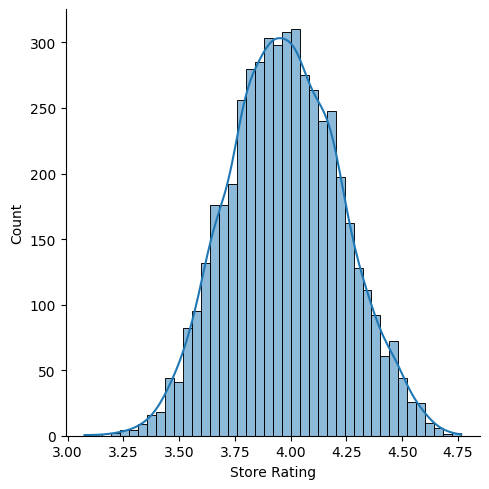

In [6]:
#Checking distribution of 'Store Rating' column
sns.displot(data=df,x='Store Rating',kde=True)

It is found that only a very small percentage of values are missing.
1. Categorical columns (Gender, Payment Method, Membership Status and   
   Preferred Visit Time) can be filled using mode.
2. Continuous numerical column (Store Rating) is having normal
   distribution. So missing values can be filled with mean

In [116]:
cal_col_df=['Gender', 'Payment Method', 'Membership Status', 'Preferred Visit Time']
for i in cal_col_df:
  df[i].fillna(df[i].mode()[0],inplace=True)
df.isna().sum()

<ipython-input-116-26d990352afe>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mode()[0],inplace=True)


Age                     0
Items Purchased         0
Total Spent             0
Discount (%)            0
Satisfaction Score      0
Warranty Extension      0
Gender                  0
Region                  0
Product Category        0
Payment Method          0
Revenue                 0
Store Rating            3
Loyalty Score           0
Membership Status       0
Preferred Visit Time    0
dtype: int64

In [117]:
df['Store Rating'].fillna(df['Store Rating'].mean(),inplace=True)
df.isna().sum()

<ipython-input-117-9e208dd007e3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Store Rating'].fillna(df['Store Rating'].mean(),inplace=True)


Age                     0
Items Purchased         0
Total Spent             0
Discount (%)            0
Satisfaction Score      0
Warranty Extension      0
Gender                  0
Region                  0
Product Category        0
Payment Method          0
Revenue                 0
Store Rating            0
Loyalty Score           0
Membership Status       0
Preferred Visit Time    0
dtype: int64

<Axes: >

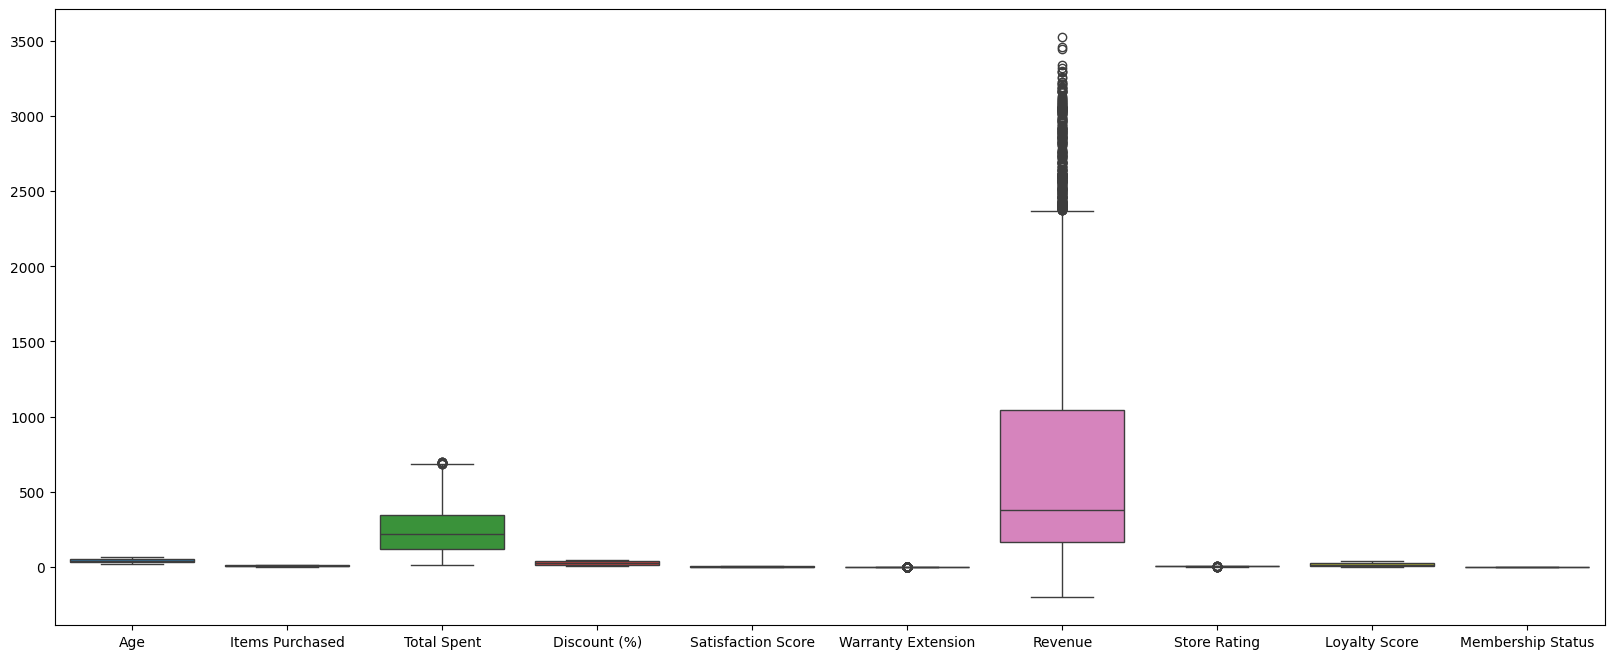

In [ ]:
#Checking outliers in numerical coluns using boxplot
df_boxplot=df.select_dtypes(exclude='object')
plt.figure(figsize=(20,8))
sns.boxplot(data=df_boxplot)

**Exploratory Data Analysis**

In [ ]:
#Checking correltion btw numerical variables
corr_matrix=df.select_dtypes(exclude='object').corr()
corr_matrix

Age  Items Purchased  Total Spent  Discount (%)  \
Age                 1.000000        -0.005522    -0.003212      0.000439   
Items Purchased    -0.005522         1.000000     0.836032     -0.853837   
Total Spent        -0.003212         0.836032     1.000000     -0.979015   
Discount (%)        0.000439        -0.853837    -0.979015      1.000000   
Satisfaction Score  0.000331         0.494572     0.597239     -0.589436   
Warranty Extension -0.034065         0.064381     0.121439     -0.086038   
Revenue            -0.006344         0.674361     0.882421     -0.829426   
Store Rating       -0.023029         0.017564     0.013547     -0.013681   
Loyalty Score       0.009317         0.557782     0.669716     -0.659179   
Membership Status   0.000485         0.006543    -0.000557      0.004464   

                    Satisfaction Score  Warranty Extension   Revenue  \
Age                           0.000331           -0.034065 -0.006344   
Items Purchased               0.494572            0.064381  0.674361   
Total Spent                   0.597239            0.121439  0.882421   
Discount (%)                 -0.589436           -0.086038 -0.829426   
Satisfaction Score            1.000000            0.062950  0.786229   
Warranty Extension            0.062950            1.000000  0.130036   
Revenue                       0.786229            0.130036  1.000000   
Store Rating                  0.010493            0.016729  0.010915   
Loyalty Score                 0.935086            0.076038  0.808505   
Membership Status             0.026250            0.011061  0.014882   

                    Store Rating  Loyalty Score  Membership Status  
Age                    -0.023029       0.009317           0.000485  
Items Purchased         0.017564       0.557782           0.006543  
Total Spent             0.013547       0.669716          -0.000557  
Discount (%)           -0.013681      -0.659179           0.004464  
Satisfaction Score      0.010493       0.935086           0.026250  
Warranty Extension      0.016729       0.076038           0.011061  
Revenue                 0.010915       0.808505           0.014882  
Store Rating            1.000000       0.007269           0.001616  
Loyalty Score           0.007269       1.000000           0.020058  
Membership Status       0.001616       0.020058           1.000000

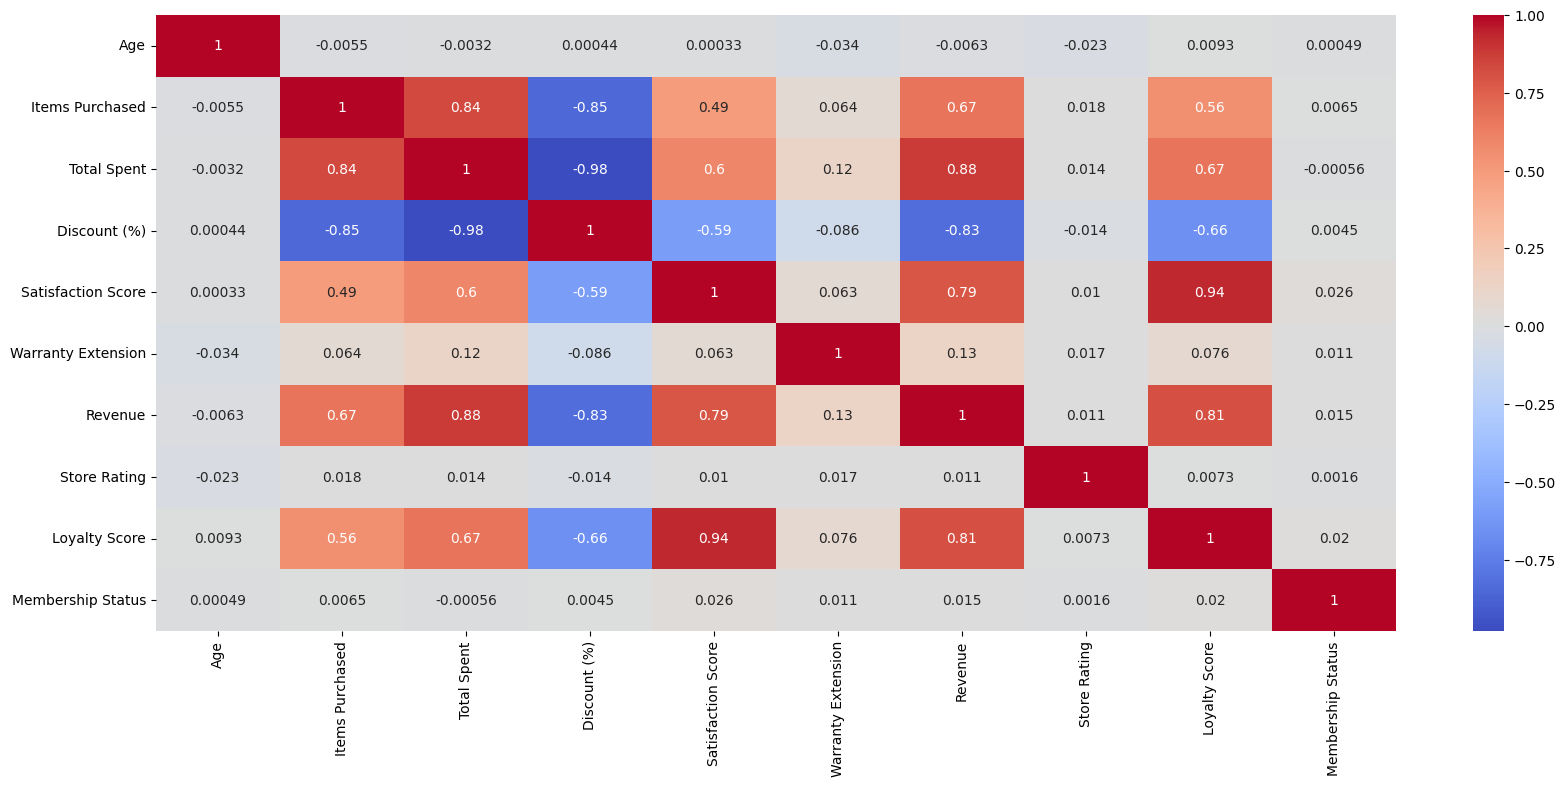

In [ ]:
plt.figure(figsize=(20,8))
sns.heatmap(corr_matrix,cmap='coolwarm',annot=True);

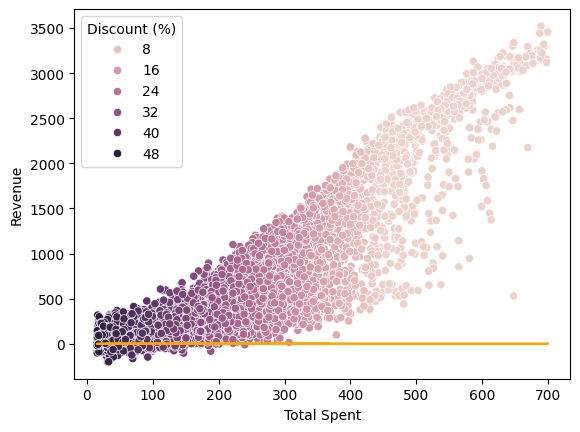

In [ ]:
sns.scatterplot(data=df,x='Total Spent',y='Revenue',hue='Discount (%)')
slope = 0
intercept = 0
line = slope * (df['Total Spent'] + intercept)

# Plot the scatter plot and custom line
plt.plot(df['Total Spent'], line, color='orange', linestyle='-', label='Custom Line')

<Axes: xlabel='Discount (%)', ylabel='Loyalty Score'>

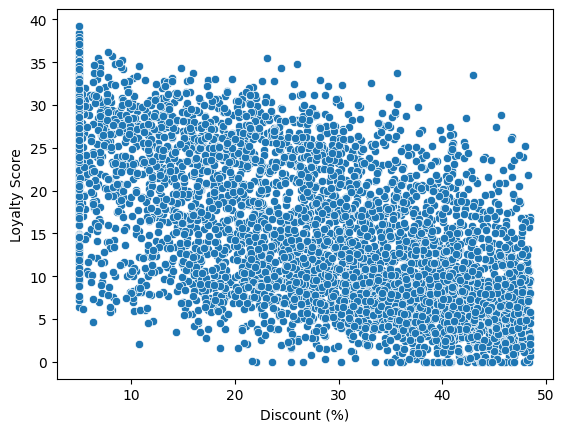

In [ ]:
sns.scatterplot(data=df,x='Discount (%)',y='Loyalty Score')

<Axes: xlabel='Total Spent', ylabel='Discount (%)'>

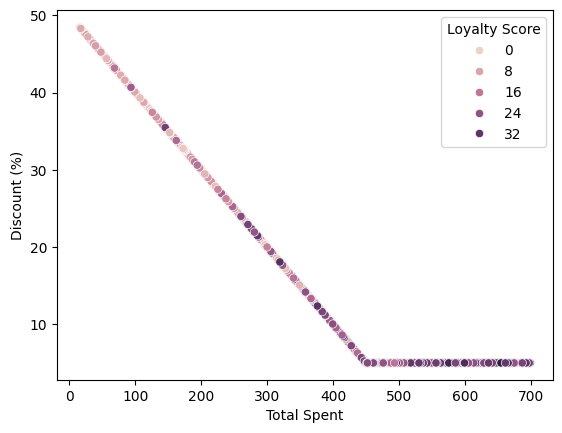

In [ ]:
sns.scatterplot(data=df,x='Total Spent',y='Discount (%)',hue='Loyalty Score')

<Axes: xlabel='Total Spent', ylabel='Discount (%)'>

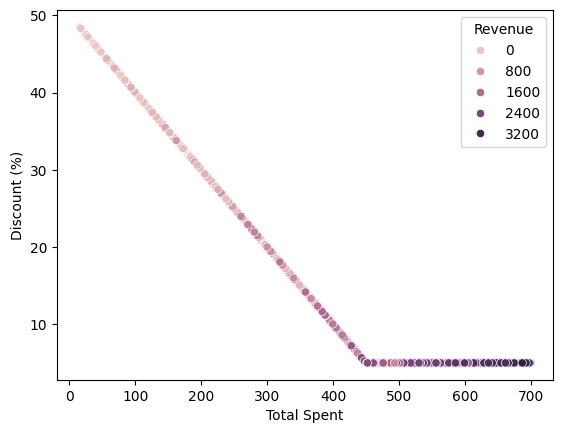

In [ ]:
sns.scatterplot(data=df,x='Total Spent',y='Discount (%)',hue='Revenue')

<Axes: xlabel='Revenue', ylabel='Discount (%)'>

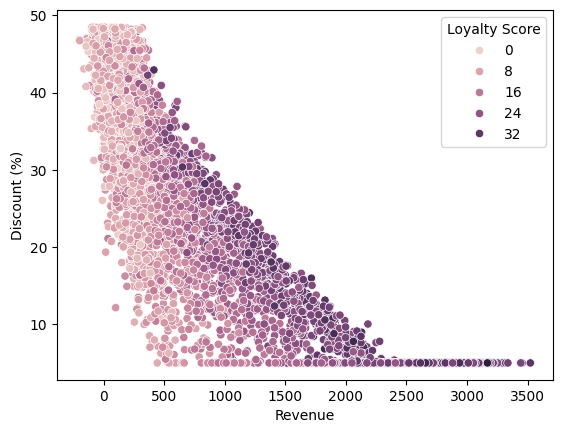

In [ ]:
sns.scatterplot(data=df,x='Revenue',y='Discount (%)',hue='Loyalty Score')

<Axes: xlabel='Discount (%)'>

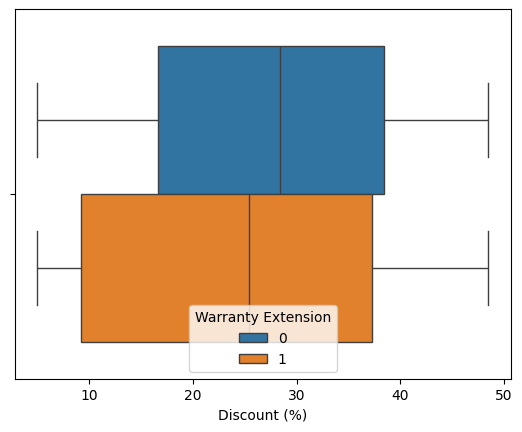

In [ ]:
sns.boxplot(data=df,x='Discount (%)',hue='Warranty Extension')

<Axes: xlabel='Loyalty Score'>

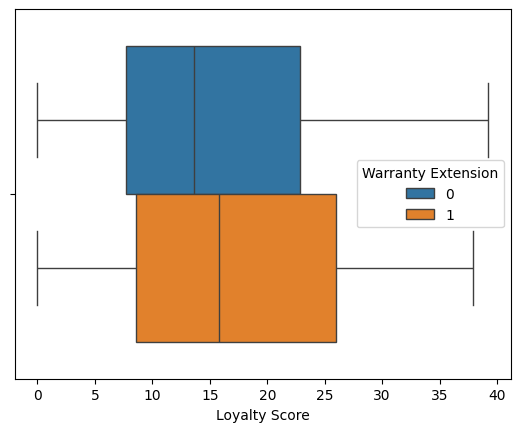

In [ ]:
sns.boxplot(data=df,x='Loyalty Score',hue='Warranty Extension')

<Axes: xlabel='Loyalty Score'>

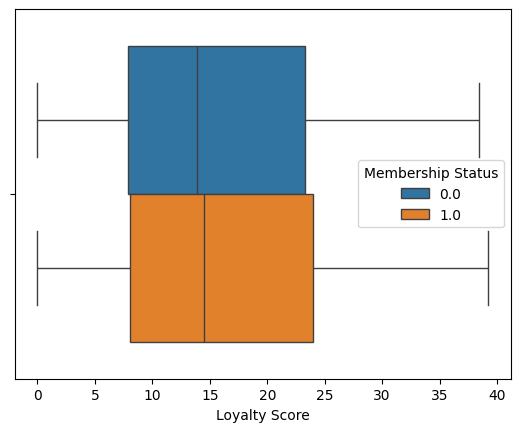

In [ ]:
sns.boxplot(data=df,x='Loyalty Score',hue='Membership Status')

**Univariate Analysis of numerical features**

<Axes: ylabel='Age'>

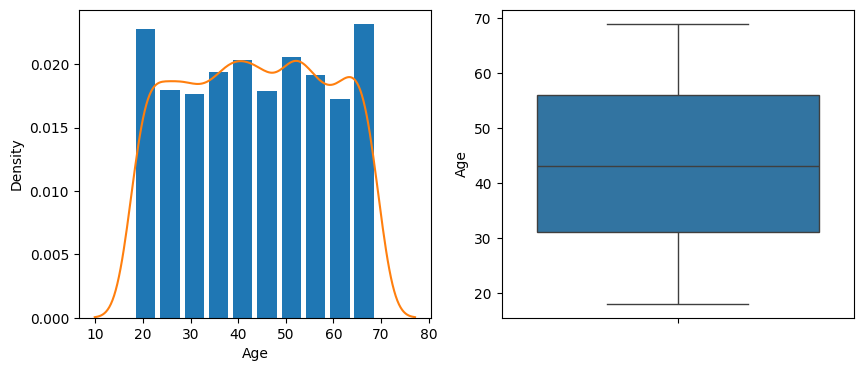

In [ ]:
# Univariate Analysis - 'Age' column
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(df['Age'],bins=10,rwidth=0.8,density=True)
sns.kdeplot(df['Age'])

plt.subplot(1,2,2)
sns.boxplot(data=df,y='Age')

<Axes: ylabel='Items Purchased'>

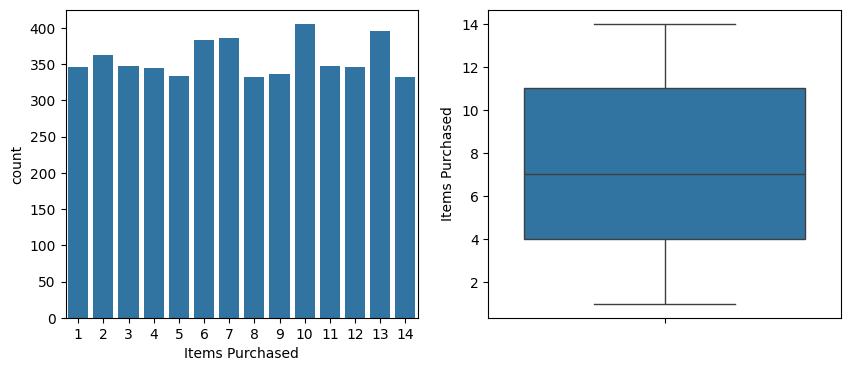

In [ ]:
# Univariate Analysis - 'Items Purchased' column
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(data=df,x='Items Purchased')

plt.subplot(1,2,2)
sns.boxplot(data=df,y='Items Purchased')

<Axes: ylabel='Total Spent'>

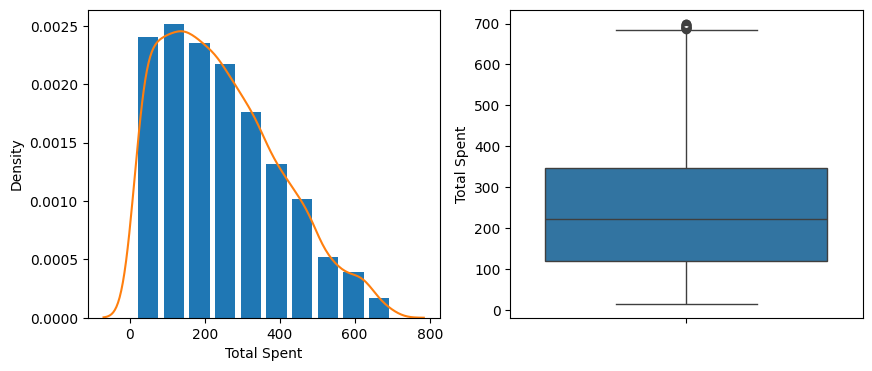

In [ ]:
# Univariate Analysis - 'Total Spent' column
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
#sns.displot(df['Total Spent'],kde=True)
plt.hist(df['Total Spent'],bins=10,rwidth=0.8,density=True)
sns.kdeplot(df['Total Spent'])

plt.subplot(1,2,2)
sns.boxplot(data=df,y='Total Spent')

<Axes: ylabel='Discount (%)'>

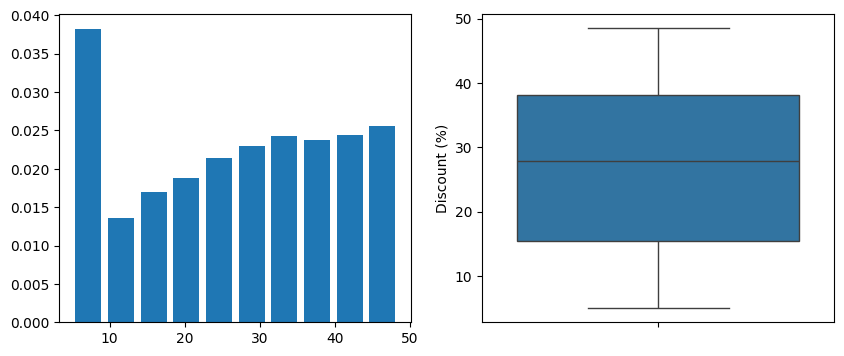

In [ ]:
# Univariate Analysis - 'Discount' column
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(df['Discount (%)'],bins=10,rwidth=0.8,density=True)
#sns.kdeplot(df['Total Spent'])

plt.subplot(1,2,2)
sns.boxplot(data=df,y='Discount (%)')

<Axes: ylabel='Satisfaction Score'>

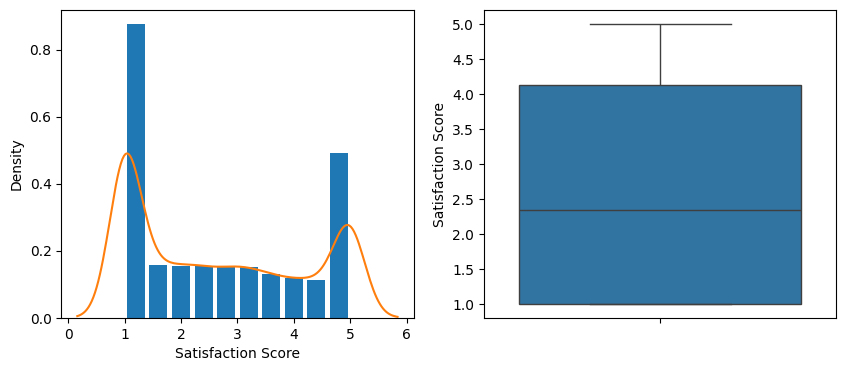

In [ ]:
# Univariate Analysis - 'Satisfaction Score' column
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(df['Satisfaction Score'],bins=10,rwidth=0.8,density=True)
sns.kdeplot(df['Satisfaction Score'])

plt.subplot(1,2,2)
sns.boxplot(data=df,y='Satisfaction Score')

<Axes: ylabel='Revenue'>

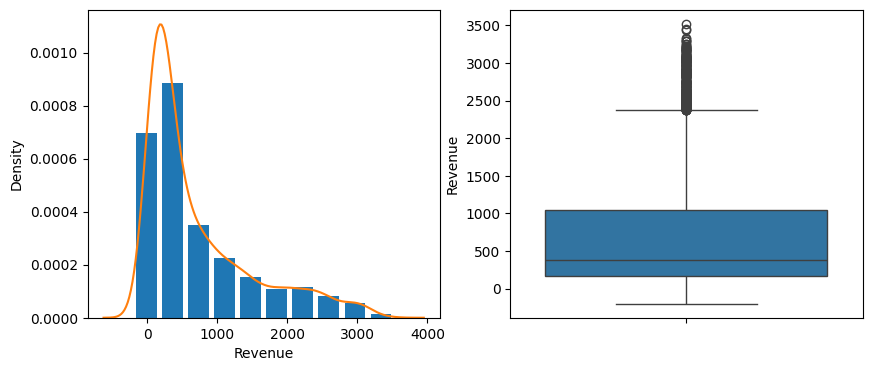

In [ ]:
# Univariate Analysis - 'Revenue' column
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(df['Revenue'],bins=10,rwidth=0.8,density=True)
sns.kdeplot(df['Revenue'])

plt.subplot(1,2,2)
sns.boxplot(data=df,y='Revenue')

<Axes: ylabel='Store Rating'>

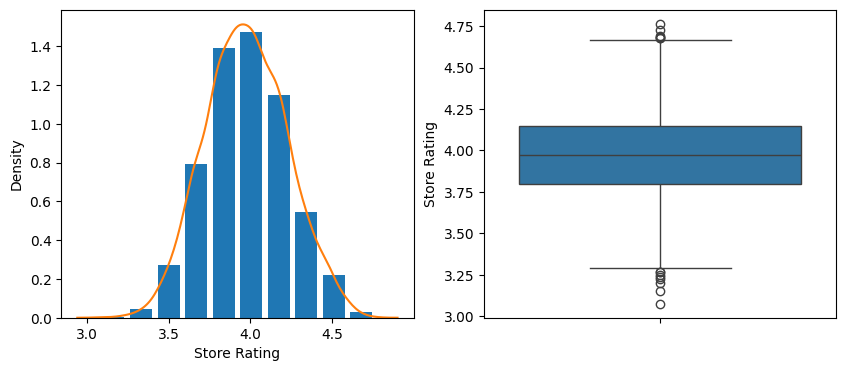

In [ ]:
# Univariate Analysis - 'Store Rating' column
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(df['Store Rating'],bins=10,rwidth=0.8,density=True)
sns.kdeplot(df['Store Rating'])

plt.subplot(1,2,2)
sns.boxplot(data=df,y='Store Rating')

<Axes: ylabel='Loyalty Score'>

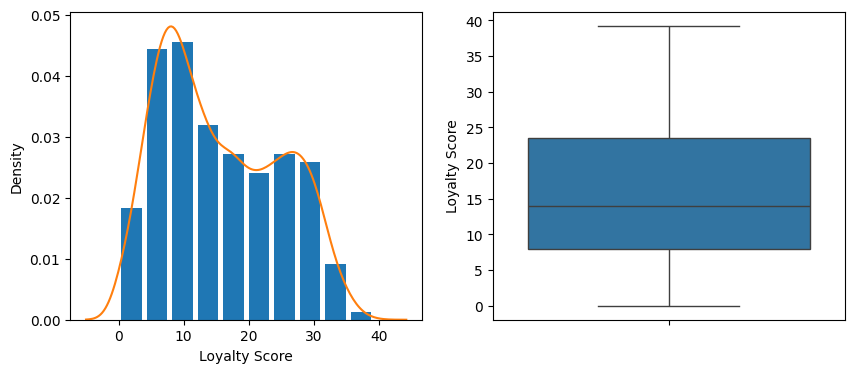

In [ ]:
# Univariate Analysis - 'Loyalty Score' column
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(df['Loyalty Score'],bins=10,rwidth=0.8,density=True)
sns.kdeplot(df['Loyalty Score'])

plt.subplot(1,2,2)
sns.boxplot(data=df,y='Loyalty Score')

1. Features like Total Spent, Discount, Revenue, follows skewed distribution, hence these features need to be scled using standard scaling.
2. Store Rting follows normal distribution

**Univariate analysis of categorical features**

<Axes: xlabel='Warranty Extension'>

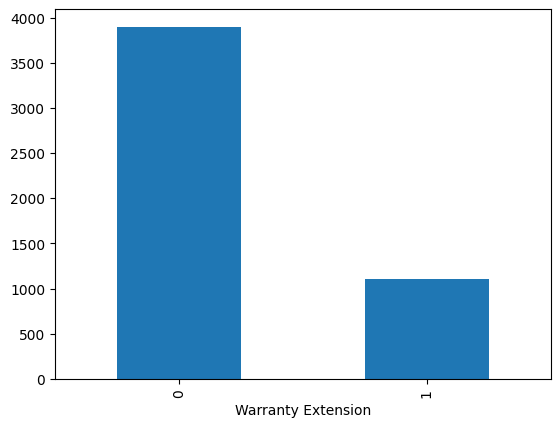

In [ ]:
# Univariate Analysis - 'Warranty Extension' column
df['Warranty Extension'].value_counts().plot(kind='bar')

<Axes: xlabel='Gender'>

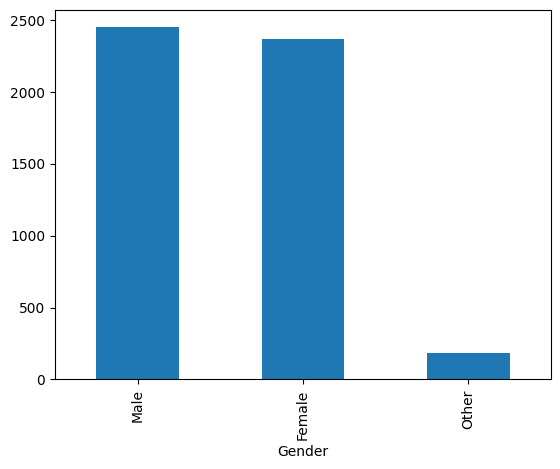

In [ ]:
# Univariate Analysis - 'Gender' column
df['Gender'].value_counts().plot(kind='bar')

<Axes: xlabel='Region'>

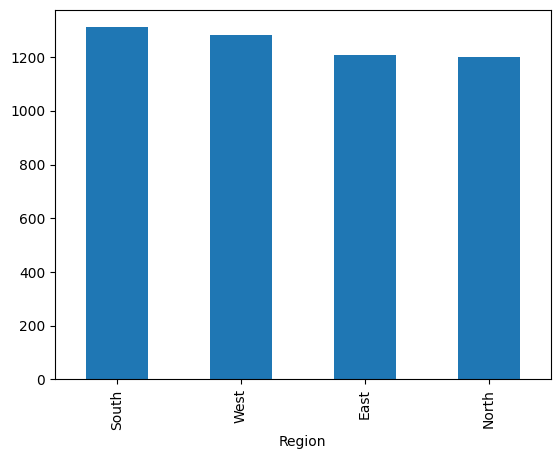

In [ ]:
# Univariate Analysis - 'Region' column
df['Region'].value_counts().plot(kind='bar')

<Axes: xlabel='Product Category'>

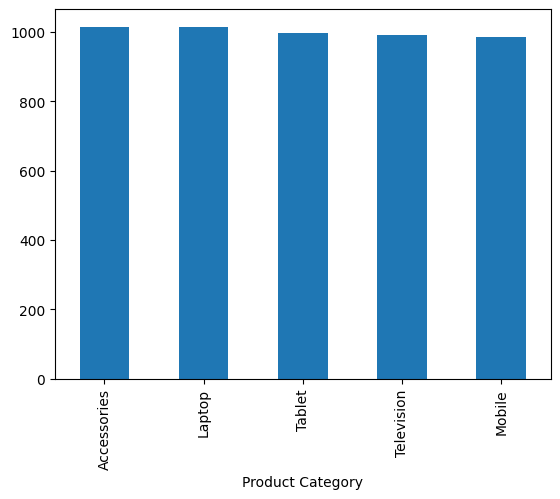

In [ ]:
# Univariate Analysis - 'Product Category' column
df['Product Category'].value_counts().plot(kind='bar')

<Axes: xlabel='Payment Method'>

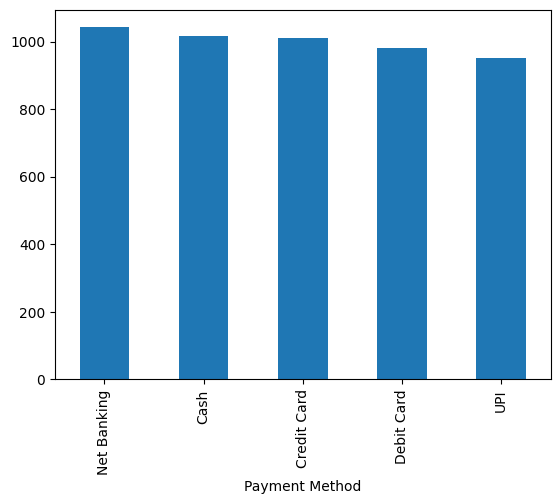

In [ ]:
# Univariate Analysis - 'Payment Method' column
df['Payment Method'].value_counts().plot(kind='bar')

<Axes: xlabel='Membership Status'>

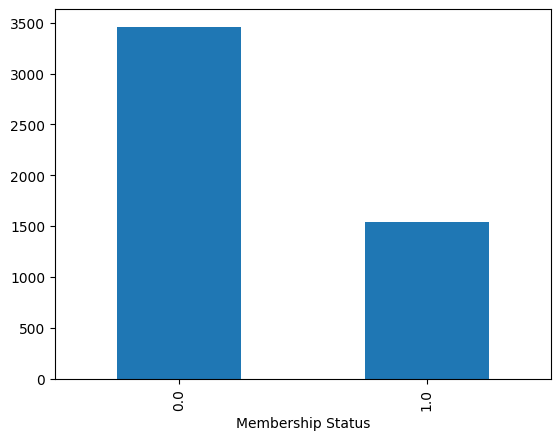

In [ ]:
# Univariate Analysis - 'Membership Status' column
df['Membership Status'].value_counts().plot(kind='bar')

<Axes: xlabel='Preferred Visit Time'>

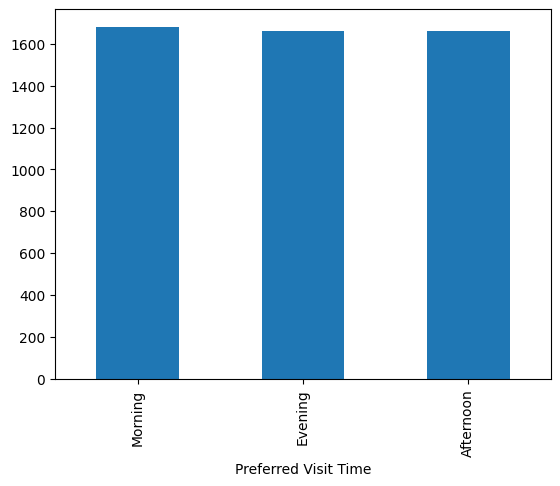

In [ ]:
# Univariate Analysis - 'Preferred Visit Time' column
df['Preferred Visit Time'].value_counts().plot(kind='bar')

1. Features like Region, product category, payment method, preferred visit time are having equal number of entries.
2. Number of customers having membership is almost 50 % less that of customers who do not have membership.
3. Number of customers who got warranty extension is less compared to those who did not get warranty extenson.
4. Male and Female customers also found to be same

**Bivariate Analysis**

Bivariate analysis is done btw all columns wrt target variable (Loyalty score)

<Axes: ylabel='Loyalty Score'>

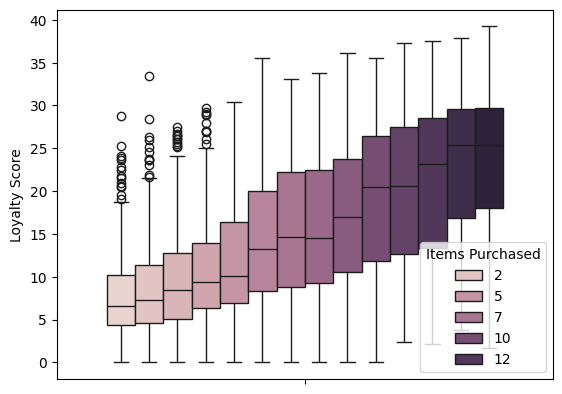

In [ ]:
#Loyalty score vs Items Purchased
sns.boxplot(data=df,y='Loyalty Score',hue='Items Purchased')

It is found that loyalty score is increasing when items purchased is more

<Axes: xlabel='Total Spent', ylabel='Loyalty Score'>

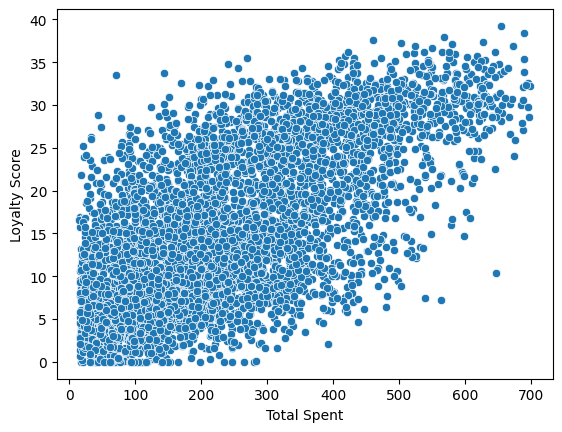

In [ ]:
#Loyalty score vs Total Spent
sns.scatterplot(data=df,x='Total Spent',y='Loyalty Score')

Loyalty and total spent has positive relation




<Axes: xlabel='Discount (%)', ylabel='Loyalty Score'>

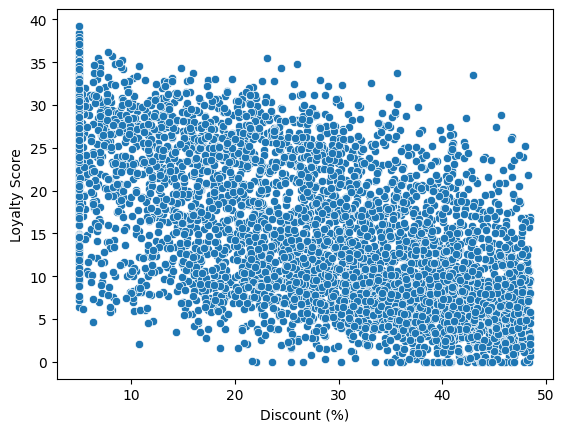

In [ ]:
#Loyalty score vs Discount
sns.scatterplot(data=df,x='Discount (%)',y='Loyalty Score')

<Axes: xlabel='Revenue', ylabel='Loyalty Score'>

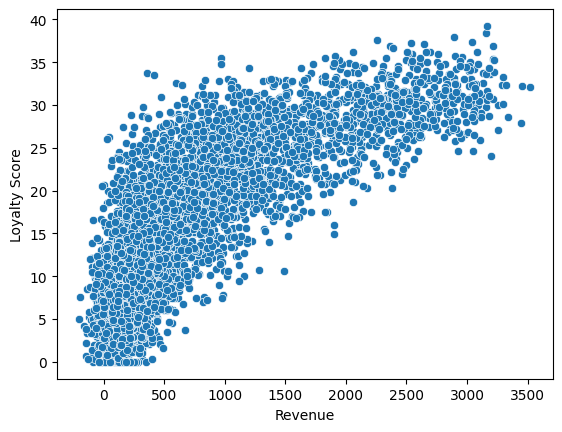

In [ ]:
#Loyalty score vs Revenue
sns.scatterplot(data=df,x='Revenue',y='Loyalty Score')

<Axes: xlabel='Store Rating', ylabel='Loyalty Score'>

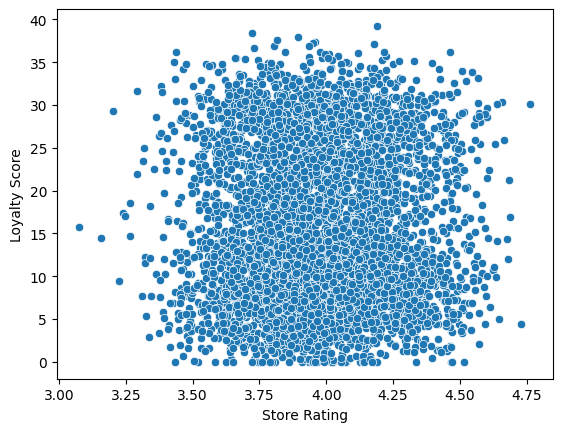

In [ ]:
#Loyalty score vs Store Rating
sns.scatterplot(data=df,x='Store Rating',y='Loyalty Score')

<Axes: xlabel='Age', ylabel='Loyalty Score'>

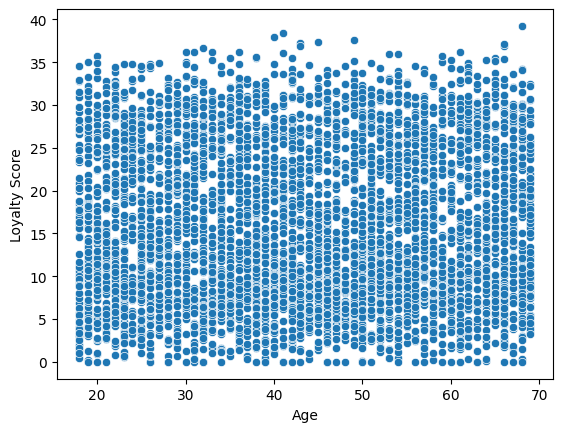

In [ ]:
#Loyalty score vs Age
sns.scatterplot(data=df,x='Age',y='Loyalty Score')

<Axes: ylabel='Loyalty Score'>

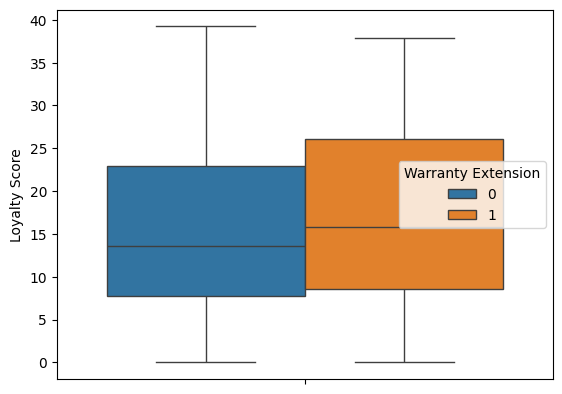

In [ ]:
#Loyalty score vs Warranty Extension
sns.boxplot(data=df,y='Loyalty Score',hue='Warranty Extension')

From above boxplot, it is found that Warranty Extension has slight impact on Loyalty Score

<ipython-input-34-a7113ca897e7>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(WE_1['Loyalty Score'],hist=True,color='red')
<ipython-input-34-a7113ca897e7>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(WE_0['Loyalty Score'],hist=True,color='blue')


<Axes: xlabel='Loyalty Score', ylabel='Density'>

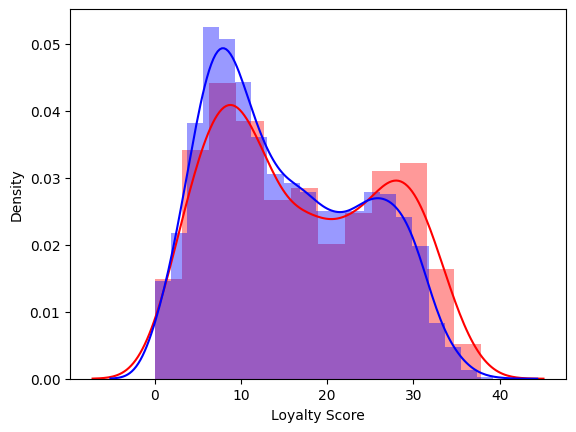

In [ ]:
#Two kde plots re drawn - red kde plot is that of Loyalty Score of customers having Warranty Extension
#blue kde plot is that of Loyalty Score of customers having no Warranty Extension
WE_1=df[df['Warranty Extension']==1]
WE_0=df[df['Warranty Extension']==0]

sns.distplot(WE_1['Loyalty Score'],hist=True,color='red')
sns.distplot(WE_0['Loyalty Score'],hist=True,color='blue')

From above kde plots, it is found that customers with warranty extension (red plot) is having a slight higher probability for more Loyalty Score

<Axes: ylabel='Loyalty Score'>

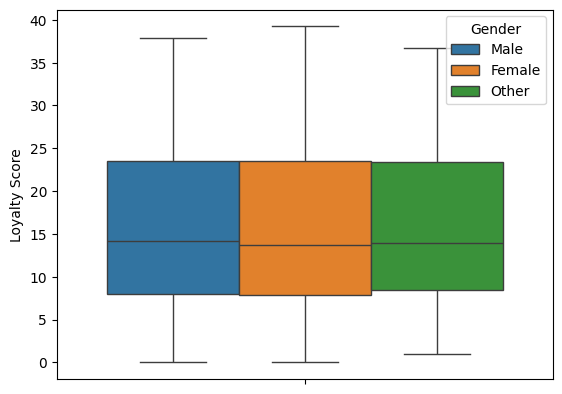

In [ ]:
#Loyalty score vs Gender
sns.boxplot(data=df,y='Loyalty Score',hue='Gender')

<Axes: ylabel='Loyalty Score'>

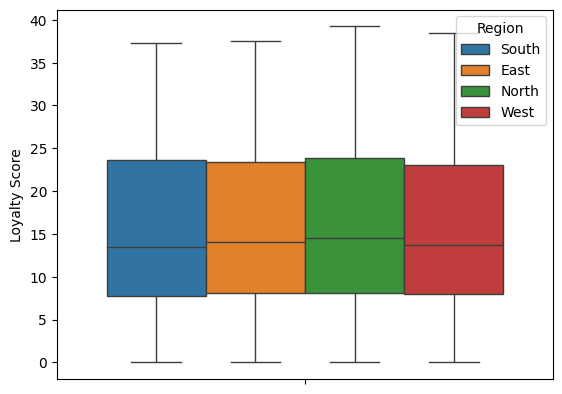

In [ ]:
#Loyalty score vs Region
sns.boxplot(data=df,y='Loyalty Score',hue='Region')

<Axes: ylabel='Loyalty Score'>

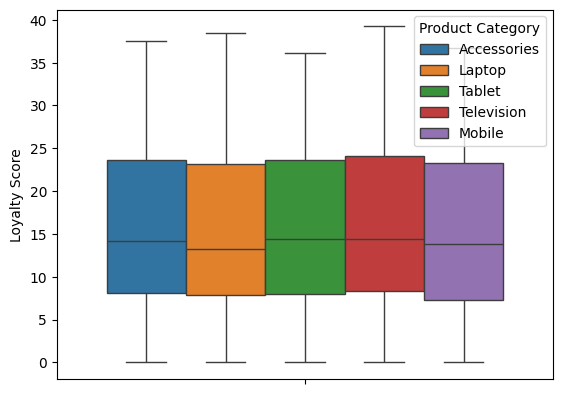

In [ ]:
#Loyalty score vs Product Category
sns.boxplot(data=df,y='Loyalty Score',hue='Product Category')

<Axes: ylabel='Loyalty Score'>

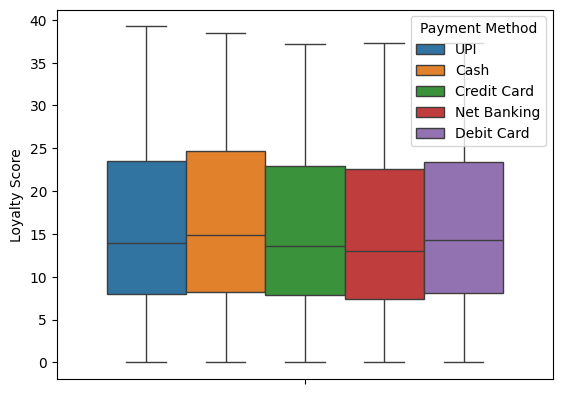

In [ ]:
#Loyalty score vs Payment Method
sns.boxplot(data=df,y='Loyalty Score',hue='Payment Method')

<Axes: ylabel='Loyalty Score'>

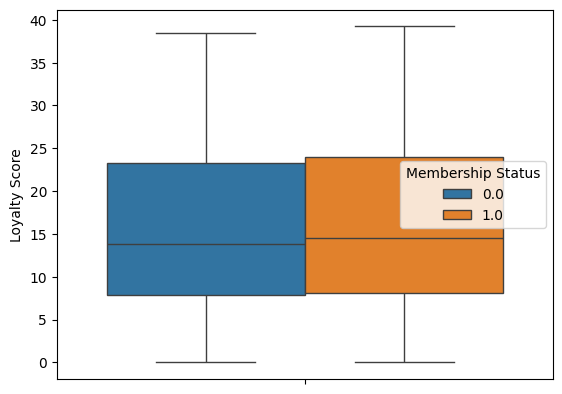

In [ ]:
#Loyalty score vs Membership Status
sns.boxplot(data=df,y='Loyalty Score',hue='Membership Status')

<Axes: ylabel='Loyalty Score'>

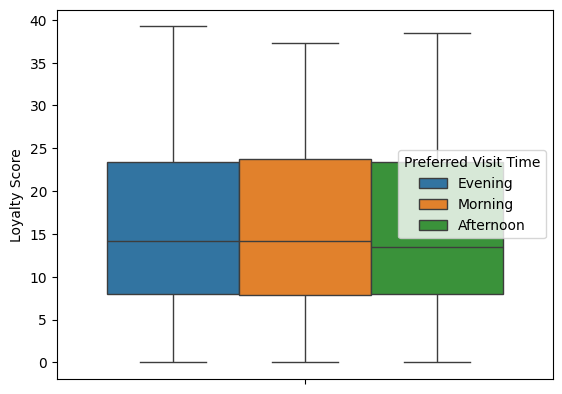

In [ ]:
#Loyalty score vs Preferred Visit Time
sns.boxplot(data=df,y='Loyalty Score',hue='Preferred Visit Time')

From bivariate analysis done so far, following are the conclusions:
1. loyalty score increases when items purchased is more
2. Loyalty and total spent has positive relation
3. Loyalty and discount has negative relation
4. Loyalty and Revenue has positive relation
5. Store Rating and Age is not affecting Loyalty much
6. Warranty extension has a slight positive effect on Loyalty
7. Remaining features (Gender, Region, Product category, Payment method, Membership status and preferred visit time) has no pronounced effect on Loyalty


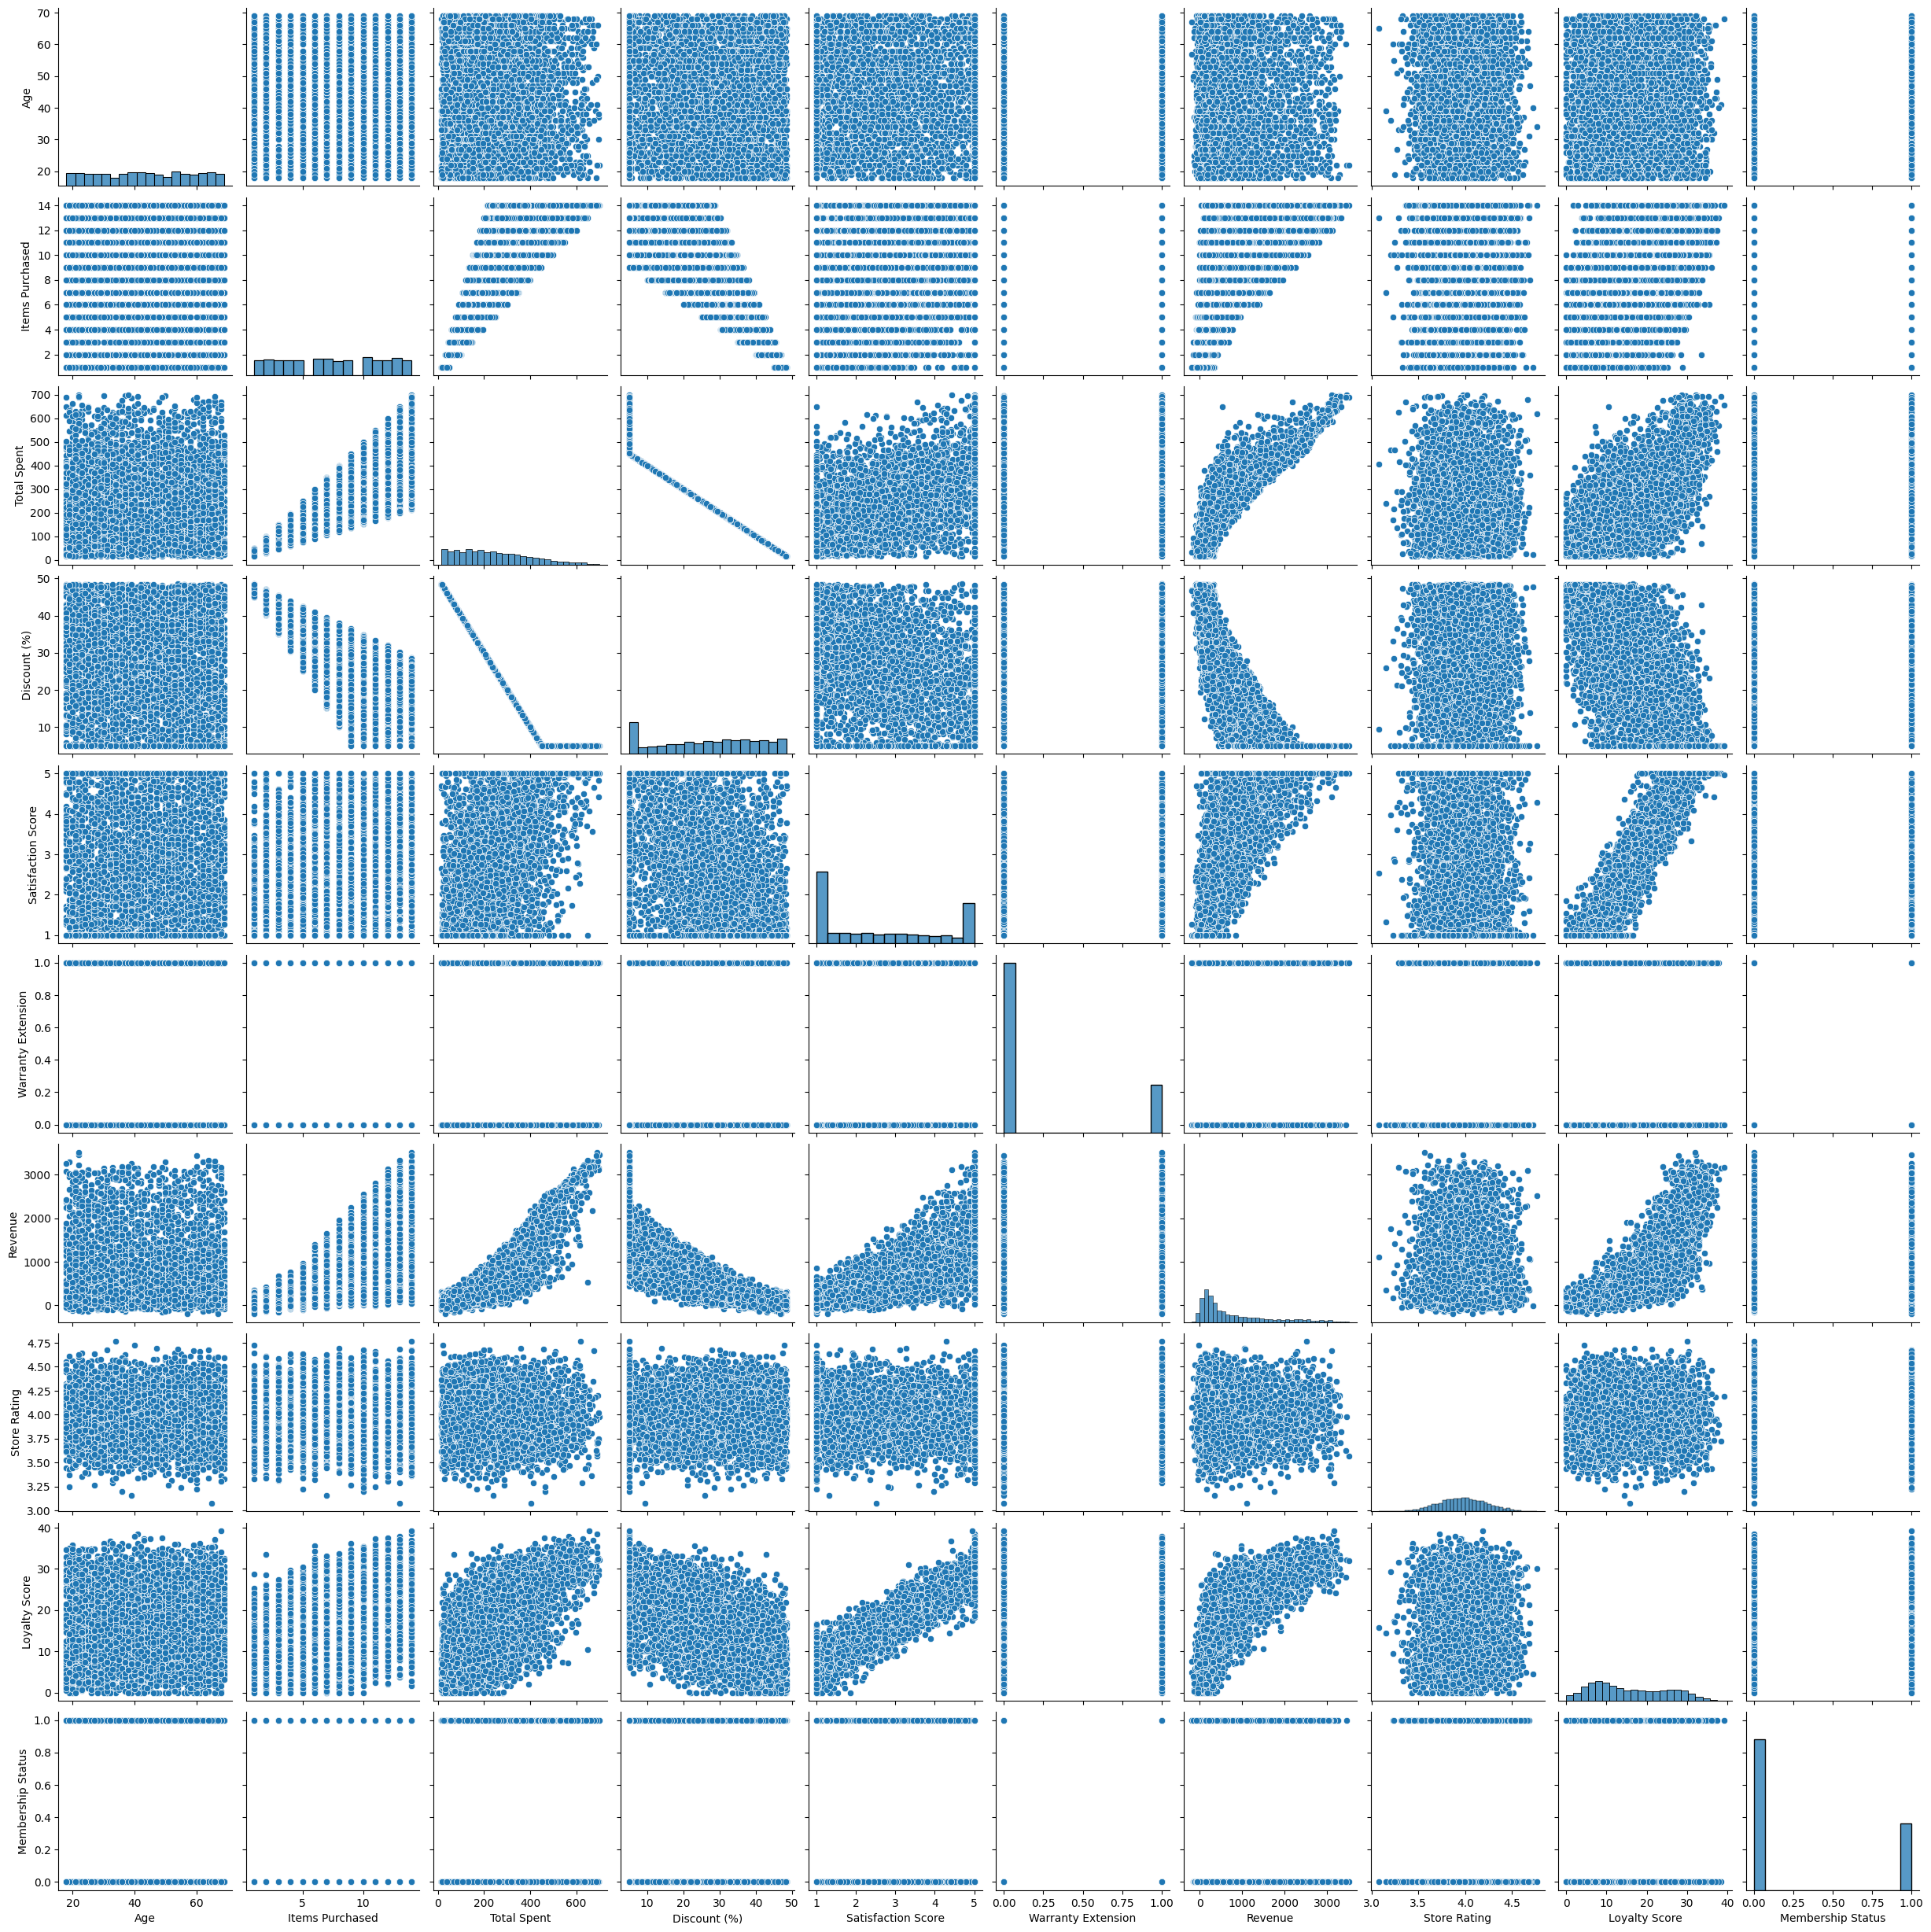

In [ ]:
#Finally, a pair plot is drawn to have an understanding of how each features relate one another
#sns.pairplot(data=df)

**Feature Engineering**

In [118]:
'''Two new features are created :
   1. Total Spent to Items Purchased Ratio
   2. Discounted Spend
'''
df['Total Spent to Items Purchased Ratio']=df['Total Spent']/df['Items Purchased']
df['Discounted Spend']=df['Total Spent']-((df['Discount (%)']/100)*df['Total Spent'])


In [119]:
df

Age  Items Purchased  Total Spent  Discount (%)  Satisfaction Score  \
0      56                1    29.226195     47.077380            1.000000   
1      69               10   420.142612      7.985739            3.760294   
2      46                4   127.742817     37.225718            1.771240   
3      32                9   417.722683      8.227732            1.926831   
4      60               13   608.031366      5.000000            3.902927   
...   ...              ...          ...           ...                 ...   
4995   24                1    39.583865     46.041613            1.000000   
4996   66                5   172.486538     32.751346            1.000000   
4997   26               11   493.388104      5.000000            2.324783   
4998   53               10   260.269589     23.973041            5.000000   
4999   36               11   366.613874     13.338613            2.718373   

      Warranty Extension  Gender Region Product Category Payment Method  \
0                      1    Male  South      Accessories            UPI   
1                      1  Female  South      Accessories           Cash   
2                      1    Male   East           Laptop    Credit Card   
3                      0  Female   East           Tablet            UPI   
4                      0  Female  South           Tablet            UPI   
...                  ...     ...    ...              ...            ...   
4995                   0    Male   West       Television    Credit Card   
4996                   0    Male   East      Accessories     Debit Card   
4997                   0    Male  North       Television    Net Banking   
4998                   1  Female   West      Accessories     Debit Card   
4999                   0  Female  South      Accessories    Net Banking   

          Revenue  Store Rating  Loyalty Score  Membership Status  \
0      149.252145      3.660461       3.597133                1.0   
1     1485.524222      3.551553      25.764903                1.0   
2       85.550131      3.922839       7.022399                1.0   
3      824.118724      3.860422       7.635412                1.0   
4     2463.590392      3.812820      29.461119                0.0   
...           ...           ...            ...                ...   
4995   -64.457793      4.187345       9.136240                0.0   
4996   138.772917      3.868131       1.961965                0.0   
4997  1010.219124      4.172183      16.750489                0.0   
4998  1114.585926      3.942221      25.562475                1.0   
4999   988.644957      3.765622      19.076740                0.0   

     Preferred Visit Time  Total Spent to Items Purchased Ratio  \
0                 Evening                             29.226195   
1                 Evening                             42.014261   
2                 Morning                             31.935704   
3               Afternoon                             46.413631   
4                 Morning                             46.771644   
...                   ...                                   ...   
4995              Morning                             39.583865   
4996              Evening                             34.497308   
4997              Evening                             44.853464   
4998            Afternoon                             26.026959   
4999              Morning                             33.328534   

      Discounted Spend  
0            15.467268  
1           386.591121  
2            80.189636  
3           383.353581  
4           577.629798  
...                ...  
4995         21.358815  
4996        115.994875  
4997        468.718699  
4998        197.875054  
4999        317.712670  

[5000 rows x 17 columns]

In [120]:
corr_matrix=df.select_dtypes(exclude='object').corr()
corr_matrix

Age  Items Purchased  Total Spent  \
Age                                   1.000000        -0.005522    -0.003212   
Items Purchased                      -0.005522         1.000000     0.836032   
Total Spent                          -0.003212         0.836032     1.000000   
Discount (%)                          0.000439        -0.853837    -0.979015   
Satisfaction Score                    0.000331         0.494572     0.597239   
Warranty Extension                   -0.034065         0.064381     0.121439   
Revenue                              -0.006344         0.674361     0.882421   
Store Rating                         -0.023029         0.017564     0.013547   
Loyalty Score                         0.009317         0.557782     0.669716   
Membership Status                     0.000485         0.006543    -0.000557   
Total Spent to Items Purchased Ratio  0.008727         0.017510     0.499109   
Discounted Spend                     -0.004435         0.807117     0.994834   

                                      Discount (%)  Satisfaction Score  \
Age                                       0.000439            0.000331   
Items Purchased                          -0.853837            0.494572   
Total Spent                              -0.979015            0.597239   
Discount (%)                              1.000000           -0.589436   
Satisfaction Score                       -0.589436            1.000000   
Warranty Extension                       -0.086038            0.062950   
Revenue                                  -0.829426            0.786229   
Store Rating                             -0.013681            0.010493   
Loyalty Score                            -0.659179            0.935086   
Membership Status                         0.004464            0.026250   
Total Spent to Items Purchased Ratio     -0.475023            0.305097   
Discounted Spend                         -0.966156            0.596171   

                                      Warranty Extension   Revenue  \
Age                                            -0.034065 -0.006344   
Items Purchased                                 0.064381  0.674361   
Total Spent                                     0.121439  0.882421   
Discount (%)                                   -0.086038 -0.829426   
Satisfaction Score                              0.062950  0.786229   
Warranty Extension                              1.000000  0.130036   
Revenue                                         0.130036  1.000000   
Store Rating                                    0.016729  0.010915   
Loyalty Score                                   0.076038  0.808505   
Membership Status                               0.011061  0.014882   
Total Spent to Items Purchased Ratio            0.090397  0.470011   
Discounted Spend                                0.127241  0.900659   

                                      Store Rating  Loyalty Score  \
Age                                      -0.023029       0.009317   
Items Purchased                           0.017564       0.557782   
Total Spent                               0.013547       0.669716   
Discount (%)                             -0.013681      -0.659179   
Satisfaction Score                        0.010493       0.935086   
Warranty Extension                        0.016729       0.076038   
Revenue                                   0.010915       0.808505   
Store Rating                              1.000000       0.007269   
Loyalty Score                             0.007269       1.000000   
Membership Status                         0.001616       0.020058   
Total Spent to Items Purchased Ratio     -0.000595       0.337672   
Discounted Spend                          0.012534       0.667501   

                                      Membership Status  \
Age                                            0.000485   
Items Purchased                                0.006543   
Total Spent                                   -0.0005

**Encoding of categorical variables**


In [121]:

#Encoding of categorical variables
from sklearn.preprocessing import StandardScaler, OneHotEncoder

#categorical_columns=df.select_dtypes(include='object').columns
categorical_columns=['Gender','Region','Product Category','Payment Method','Membership Status','Preferred Visit Time']
one_hot_enc=OneHotEncoder(sparse_output=False)
encoded_data=one_hot_enc.fit_transform(df[categorical_columns])
encoded_data

array([[0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [122]:

encoded_categorical_df = pd.DataFrame(encoded_data,columns=one_hot_enc.get_feature_names_out(categorical_columns))
data_encoded=pd.concat([df.drop(columns=categorical_columns),encoded_categorical_df],axis=1)
data_encoded

Age  Items Purchased  Total Spent  Discount (%)  Satisfaction Score  \
0      56                1    29.226195     47.077380            1.000000   
1      69               10   420.142612      7.985739            3.760294   
2      46                4   127.742817     37.225718            1.771240   
3      32                9   417.722683      8.227732            1.926831   
4      60               13   608.031366      5.000000            3.902927   
...   ...              ...          ...           ...                 ...   
4995   24                1    39.583865     46.041613            1.000000   
4996   66                5   172.486538     32.751346            1.000000   
4997   26               11   493.388104      5.000000            2.324783   
4998   53               10   260.269589     23.973041            5.000000   
4999   36               11   366.613874     13.338613            2.718373   

      Warranty Extension      Revenue  Store Rating  Loyalty Score  \
0                      1   149.252145      3.660461       3.597133   
1                      1  1485.524222      3.551553      25.764903   
2                      1    85.550131      3.922839       7.022399   
3                      0   824.118724      3.860422       7.635412   
4                      0  2463.590392      3.812820      29.461119   
...                  ...          ...           ...            ...   
4995                   0   -64.457793      4.187345       9.136240   
4996                   0   138.772917      3.868131       1.961965   
4997                   0  1010.219124      4.172183      16.750489   
4998                   1  1114.585926      3.942221      25.562475   
4999                   0   988.644957      3.765622      19.076740   

      Total Spent to Items Purchased Ratio  ...  Payment Method_Cash  \
0                                29.226195  ...                  0.0   
1                                42.014261  ...                  1.0   
2                                31.935704  ...                  0.0   
3                                46.413631  ...                  0.0   
4                                46.771644  ...                  0.0   
...                                    ...  ...                  ...   
4995                             39.583865  ...                  0.0   
4996                             34.497308  ...                  0.0   
4997                             44.853464  ...                  0.0   
4998                             26.026959  ...                  0.0   
4999                             33.328534  ...                  0.0   

      Payment Method_Credit Card  Payment Method_Debit Card  \
0                            0.0                        0.0   
1                            0.0                        0.0   
2                            1.0                        0.0   
3                            0.0                        0.0   
4                            0.0                        0.0   
...                          ...                        ...   
4995                         1.0                        0.0   
4996                         0.0                        1.0   
4997                         0.0                        0.0   
4998                         0.0                        1.0   
4999                         0.0                        0.0   

      Payment Method_Net Banking  Payment Method_UPI  Membership Status_0.0  \
0                            0.0                 1.0                    0.0   
1                            0.0                 0.0                    0.0   
2                            0.0                 0.0                    0.0   
3                            0.0                 1.0                    0.0   
4                            0.0                 1.0                    1.0   
...                          ...                 ...                    ...   
4995                         0.0                 0.0             

In [123]:
data_encoded.columns

Index(['Age', 'Items Purchased', 'Total Spent', 'Discount (%)',
       'Satisfaction Score', 'Warranty Extension', 'Revenue', 'Store Rating',
       'Loyalty Score', 'Total Spent to Items Purchased Ratio',
       'Discounted Spend', 'Gender_Female', 'Gender_Male', 'Gender_Other',
       'Region_East', 'Region_North', 'Region_South', 'Region_West',
       'Product Category_Accessories', 'Product Category_Laptop',
       'Product Category_Mobile', 'Product Category_Tablet',
       'Product Category_Television', 'Payment Method_Cash',
       'Payment Method_Credit Card', 'Payment Method_Debit Card',
       'Payment Method_Net Banking', 'Payment Method_UPI',
       'Membership Status_0.0', 'Membership Status_1.0',
       'Preferred Visit Time_Afternoon', 'Preferred Visit Time_Evening',
       'Preferred Visit Time_Morning'],
      dtype='object')

**Standardisation of continuous numerical variables**

In [124]:
#Standardisation of continuous numerical variables
#those columns following skewed distribution are selected
numerical_columns=['Age','Items Purchased','Total Spent','Store Rating','Total Spent to Items Purchased Ratio']

std_scaler=StandardScaler()
data_std_scaled=data_encoded.copy()

data_std_scaled[numerical_columns]=std_scaler.fit_transform(data_std_scaled[numerical_columns])
data_std_scaled

Age  Items Purchased  Total Spent  Discount (%)  \
0     0.832265        -1.628265    -1.384437     47.077380   
1     1.703719         0.613632     1.138687      7.985739   
2     0.161916        -0.880966    -0.748573     37.225718   
3    -0.776573         0.364533     1.123068      8.227732   
4     1.100405         1.360931     2.351393      5.000000   
...        ...              ...          ...           ...   
4995 -1.312852        -1.628265    -1.317584     46.041613   
4996  1.502614        -0.631866    -0.459780     32.751346   
4997 -1.178782         0.862732     1.611441      5.000000   
4998  0.631160         0.613632     0.106805     23.973041   
4999 -0.508433         0.862732     0.793192     13.338613   

      Satisfaction Score  Warranty Extension      Revenue  Store Rating  \
0               1.000000                   1   149.252145     -1.255925   
1               3.760294                   1  1485.524222     -1.690529   
2               1.771240                   1    85.550131     -0.208885   
3               1.926831                   0   824.118724     -0.457967   
4               3.902927                   0  2463.590392     -0.647925   
...                  ...                 ...          ...           ...   
4995            1.000000                   0   -64.457793      0.846645   
4996            1.000000                   0   138.772917     -0.427204   
4997            2.324783                   0  1010.219124      0.786138   
4998            5.000000                   1  1114.585926     -0.131540   
4999            2.718373                   0   988.644957     -0.836272   

      Loyalty Score  Total Spent to Items Purchased Ratio  ...  \
0          3.597133                             -0.302138  ...   
1         25.764903                              0.977658  ...   
2          7.022399                             -0.030977  ...   
3          7.635412                              1.417935  ...   
4         29.461119                              1.453764  ...   
...             ...                                   ...  ...   
4995       9.136240                              0.734430  ...   
4996       1.961965                              0.225381  ...   
4997      16.750489                              1.261798  ...   
4998      25.562475                             -0.622309  ...   
4999      19.076740                              0.108413  ...   

      Payment Method_Cash  Payment Method_Credit Card  \
0                     0.0                         0.0   
1                     1.0                         0.0   
2                     0.0                         1.0   
3                     0.0                         0.0   
4                     0.0                         0.0   
...                   ...                         ...   
4995                  0.0                         1.0   
4996                  0.0                         0.0   
4997                  0.0                         0.0   
4998                  0.0                         0.0   
4999                  0.0                         0.0   

      Payment Method_Debit Card  Payment Method_Net Banking  \
0                           0.0                         0.0   
1                           0.0                         0.0   
2                           0.0                         0.0   
3                           0.0                         0.0   
4                           0.0                         0.0   
...                         ...                         ...   
4995                        0.0                         0.0   
4996                        1.0                         0.0   
4997                        0.0                         1.0   
4998                        1.0                         0.0   
4999                        0.0                         1.0   

      Payment Method_UPI  Membership Status_0.0  Membership Status_1.0  \
0                    1.0                    0.0         

In [ ]:
# Segmented customer data based on features such as Region and Product Category
#Loyalty score segmented based on Region and Product Category
pd.set_option('display.max_columns',None)
df.groupby(['Region','Product Category'])['Loyalty Score'].agg(['min','max','mean','median','std'])

min        max       mean     median       std
Region Product Category                                                     
East   Accessories       0.000000  37.578976  16.600523  14.738607  9.490028
       Laptop            0.000000  34.342763  15.829647  13.608720  9.077223
       Mobile            0.000000  36.681612  15.322231  13.958162  9.108769
       Tablet            0.000000  36.136085  15.656017  14.414952  9.278438
       Television        0.000000  35.516979  15.154417  13.083931  8.965633
North  Accessories       0.841803  37.178340  16.037103  14.704595  8.988430
       Laptop            0.000000  34.980678  15.453767  14.258461  8.823791
       Mobile            0.000000  34.187085  15.832354  14.591171  9.377984
       Tablet            0.000000  36.173764  16.379996  16.225378  8.989565
       Television        0.000000  39.235391  15.925205  13.439300  9.615487
South  Accessories       0.000000  34.757758  15.427258  13.181111  9.199291
       Laptop            0.000000  35.034488  14.576948  12.496439  8.811208
       Mobile            0.000000  36.158592  15.222514  13.448671  9.515777
       Tablet            0.000000  36.096598  15.472861  13.499263  9.254354
       Television        0.000000  37.338296  16.665107  15.919533  9.553925
West   Accessories       0.000000  35.548052  15.238295  13.189129  9.190001
       Laptop            0.987948  38.400774  15.306604  12.851285  9.017874
       Mobile            0.000000  34.612956  15.073330  13.352783  8.646240
       Tablet            0.000000  35.988961  15.720870  13.846545  9.081463
       Television        0.000000  37.895506  16.048103  14.857775  8.704391

<ipython-input-92-b3fba87f06e7>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Wt,color='red')
<ipython-input-92-b3fba87f06e7>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Et,color='blue')
<ipython-input-92-b3fba87f06e7>:9: UserWarning: 

`distplot` is a deprecated function and will be rem

<Axes: xlabel='Loyalty Score', ylabel='Density'>

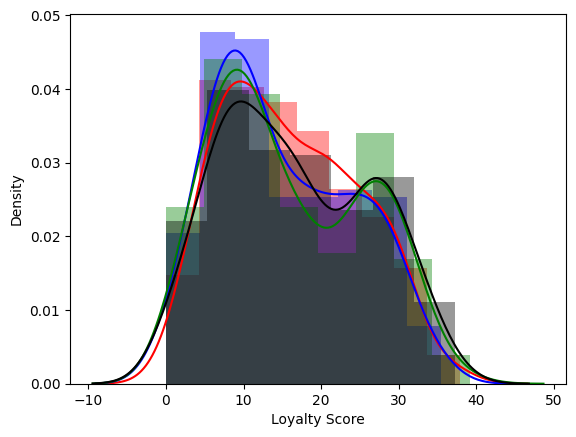

In [ ]:
Wt=df[(df['Region']=='West') & (df['Product Category']=='Television')]['Loyalty Score']
Et=df[(df['Region']=='East') & (df['Product Category']=='Television')]['Loyalty Score']
St=df[(df['Region']=='North') & (df['Product Category']=='Television')]['Loyalty Score']
Nt=df[(df['Region']=='South') & (df['Product Category']=='Television')]['Loyalty Score']
#sns.displot(Wt,kde=True)
#sns.displot(Et,kde=True)
sns.distplot(Wt,color='red')
sns.distplot(Et,color='blue')
sns.distplot(St,color='green')
sns.distplot(Nt,color='black')

In [ ]:
#Above plot shows kde distribution of loyalty score corresponding to product Television in each Regions

**Feature Selection**

Best five features are found using mutual_info_regression and f_regression of seleckkbest method. Loyalty score is chosen as target variable



In [125]:
from sklearn.model_selection import train_test_split
X=data_encoded.drop('Loyalty Score',axis=1)
y=data_encoded['Loyalty Score']

In [126]:
#f_regression is used to find best 5 features that may affect target variable
from sklearn.feature_selection import SelectKBest, mutual_info_regression, f_regression
X_clf_new=SelectKBest(score_func=f_regression,k=5).fit_transform(X,y) #no of best features to be selected as 5
print(X_clf_new[:5]) #X_clf_new is an numpy array which has values corresponding to best 5 features and values in first 5 rows are printed

[[2.92261951e+01 4.70773805e+01 1.00000000e+00 1.49252145e+02
  1.54672680e+01]
 [4.20142612e+02 7.98573877e+00 3.76029424e+00 1.48552422e+03
  3.86591121e+02]
 [1.27742817e+02 3.72257183e+01 1.77124030e+00 8.55501308e+01
  8.01896358e+01]
 [4.17722683e+02 8.22773171e+00 1.92683117e+00 8.24118724e+02
  3.83353581e+02]
 [6.08031366e+02 5.00000000e+00 3.90292684e+00 2.46359039e+03
  5.77629798e+02]]


In [127]:
print(X.head()) #first 5 values in our original data frame are printed and compared with above values to identify the feature names

   Age  Items Purchased  Total Spent  Discount (%)  Satisfaction Score  \
0   56                1    29.226195     47.077380            1.000000   
1   69               10   420.142612      7.985739            3.760294   
2   46                4   127.742817     37.225718            1.771240   
3   32                9   417.722683      8.227732            1.926831   
4   60               13   608.031366      5.000000            3.902927   

   Warranty Extension      Revenue  Store Rating  \
0                   1   149.252145      3.660461   
1                   1  1485.524222      3.551553   
2                   1    85.550131      3.922839   
3                   0   824.118724      3.860422   
4                   0  2463.590392      3.812820   

   Total Spent to Items Purchased Ratio  Discounted Spend  ...  \
0                             29.226195         15.467268  ...   
1                             42.014261        386.591121  ...   
2                             31.935704     

Best 5 features identified using f_regression are: Total Spent,  Discount (%),  Satisfaction Score, Revenue and Discounted Spend

In [128]:
#mutual_info_regression is used to find best 5 features that may affect target variable
from sklearn.feature_selection import SelectKBest, chi2, f_regression
X_clf_new=SelectKBest(score_func=mutual_info_regression,k=5).fit_transform(X,y)
print(X_clf_new[:5])

[[2.92261951e+01 4.70773805e+01 1.00000000e+00 1.49252145e+02
  1.54672680e+01]
 [4.20142612e+02 7.98573877e+00 3.76029424e+00 1.48552422e+03
  3.86591121e+02]
 [1.27742817e+02 3.72257183e+01 1.77124030e+00 8.55501308e+01
  8.01896358e+01]
 [4.17722683e+02 8.22773171e+00 1.92683117e+00 8.24118724e+02
  3.83353581e+02]
 [6.08031366e+02 5.00000000e+00 3.90292684e+00 2.46359039e+03
  5.77629798e+02]]


In [129]:
print(X.head())

   Age  Items Purchased  Total Spent  Discount (%)  Satisfaction Score  \
0   56                1    29.226195     47.077380            1.000000   
1   69               10   420.142612      7.985739            3.760294   
2   46                4   127.742817     37.225718            1.771240   
3   32                9   417.722683      8.227732            1.926831   
4   60               13   608.031366      5.000000            3.902927   

   Warranty Extension      Revenue  Store Rating  \
0                   1   149.252145      3.660461   
1                   1  1485.524222      3.551553   
2                   1    85.550131      3.922839   
3                   0   824.118724      3.860422   
4                   0  2463.590392      3.812820   

   Total Spent to Items Purchased Ratio  Discounted Spend  ...  \
0                             29.226195         15.467268  ...   
1                             42.014261        386.591121  ...   
2                             31.935704     

Best 5 features identified using mutual_info_regression are: Total Spent,  Discount (%),  Satisfaction Score, Revenue and Discounted Spend

In [113]:
corr_col=df.select_dtypes(exclude='object').corr()
corr_col

Age  Items Purchased  Total Spent  \
Age                                   1.000000        -0.005522    -0.003212   
Items Purchased                      -0.005522         1.000000     0.836032   
Total Spent                          -0.003212         0.836032     1.000000   
Discount (%)                          0.000439        -0.853837    -0.979015   
Satisfaction Score                    0.000331         0.494572     0.597239   
Warranty Extension                   -0.034065         0.064381     0.121439   
Revenue                              -0.006344         0.674361     0.882421   
Store Rating                         -0.023029         0.017564     0.013547   
Loyalty Score                         0.009317         0.557782     0.669716   
Membership Status                     0.000485         0.006543    -0.000557   
Total Spent to Items Purchased Ratio  0.008727         0.017510     0.499109   
Discounted Spend                     -0.004435         0.807117     0.994834   

                                      Discount (%)  Satisfaction Score  \
Age                                       0.000439            0.000331   
Items Purchased                          -0.853837            0.494572   
Total Spent                              -0.979015            0.597239   
Discount (%)                              1.000000           -0.589436   
Satisfaction Score                       -0.589436            1.000000   
Warranty Extension                       -0.086038            0.062950   
Revenue                                  -0.829426            0.786229   
Store Rating                             -0.013681            0.010493   
Loyalty Score                            -0.659179            0.935086   
Membership Status                         0.004464            0.026250   
Total Spent to Items Purchased Ratio     -0.475023            0.305097   
Discounted Spend                         -0.966156            0.596171   

                                      Warranty Extension   Revenue  \
Age                                            -0.034065 -0.006344   
Items Purchased                                 0.064381  0.674361   
Total Spent                                     0.121439  0.882421   
Discount (%)                                   -0.086038 -0.829426   
Satisfaction Score                              0.062950  0.786229   
Warranty Extension                              1.000000  0.130036   
Revenue                                         0.130036  1.000000   
Store Rating                                    0.016729  0.010915   
Loyalty Score                                   0.076038  0.808505   
Membership Status                               0.011061  0.014882   
Total Spent to Items Purchased Ratio            0.090397  0.470011   
Discounted Spend                                0.127241  0.900659   

                                      Store Rating  Loyalty Score  \
Age                                      -0.023029       0.009317   
Items Purchased                           0.017564       0.557782   
Total Spent                               0.013547       0.669716   
Discount (%)                             -0.013681      -0.659179   
Satisfaction Score                        0.010493       0.935086   
Warranty Extension                        0.016729       0.076038   
Revenue                                   0.010915       0.808505   
Store Rating                              1.000000       0.007269   
Loyalty Score                             0.007269       1.000000   
Membership Status                         0.001616       0.020058   
Total Spent to Items Purchased Ratio     -0.000595       0.337672   
Discounted Spend                          0.012534       0.667501   

                                      Membership Status  \
Age                                            0.000485   
Items Purchased                                0.006543   
Total Spent                                   -0.0005

Using correlation matrix, five features that most affect target are Satisfaction score, Revenue, Total spent, Discount and Items purchased

**Model Selection and Testing**

Loyalty score is chosen as target variable.

In first part, Regression models like Linear Regression, Lasso Regression, Random Forest Regression, Polynomial Regression, Decision Tree Regression, Ridge Regression, etc are tested with 'Satisfaction Score' as one input feature.

In second part, same regression models are tested with 'Satisfaction Score' deleted.
Since Satisfaction Score is highly correlated to target variable, it is expected that r2 score and errors will be better in first part

In [130]:
#Splitting dataset to X and y (Loyalty score is taken as target variable)
from sklearn.model_selection import train_test_split
X=data_encoded.drop('Loyalty Score',axis=1)
y=data_encoded['Loyalty Score']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,train_size=0.8)

In [131]:
#Linear Regression

In [132]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model=lr.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_pred

array([ 9.06319865, 14.03250512, 18.63298691, 15.82658499, 12.17219621,
       19.57068606,  6.22644813, 13.7149825 , 28.61171839,  6.33552604,
        7.60067467, 18.68564593,  5.71302817, 13.93499037,  9.11492049,
        9.5981184 , 14.85210946, 24.87914134,  6.35719051,  5.98908588,
        6.69082762, 11.70964857, 10.76632328, 12.04504712, 15.98393559,
        5.22949628, 25.82083325,  5.6512572 ,  8.80401806,  9.65066019,
       27.91514552,  5.86937763, 17.61742211,  7.53084086, 31.33372538,
       10.81090675,  9.96677751, 31.61829928,  8.60863571, 13.5278151 ,
       24.66638354,  7.81475169, 29.13567111,  5.67345696,  5.7810077 ,
       10.71194047, 25.93215377, 29.28406966, 13.92814807, 10.27419928,
       10.39820892, 24.16621193, 16.61732359,  6.55561939, 14.12729393,
       15.26109266, 28.4083624 , 25.06753835, 27.73294148, 29.25909818,
       29.11883039,  5.36853634,  8.26013357,  7.16716768, 17.9280378 ,
        4.96904161, 31.49132528,  5.82368264,  5.20642393, 14.26

In [133]:
from sklearn.metrics import mean_squared_error,r2_score

mse=mean_squared_error(y_test,y_pred)
mse

9.080285521485246

In [134]:
r_value=r2_score(y_test,y_pred)
r_value

0.8900325986996027

In [135]:
#Lasso Regression

In [136]:
from sklearn.linear_model import Lasso
lo=Lasso()
model_lo=lo.fit(X_train,y_train)
y_pred_lo=lo.predict(X_test)
y_pred_lo

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.171e+01, tolerance: 3.354e+01
  model = cd_fast.enet_coordinate_descent(


array([ 9.92992246, 13.81535733, 18.36499013, 15.78790793, 11.87637425,
       19.30643109,  7.17092501, 14.32121031, 28.37434493,  7.06638802,
        9.63060693, 18.08258656,  7.23349837, 13.17209644, 10.20508161,
       10.58124708, 15.31705881, 23.25719088,  7.48454978,  7.853342  ,
        8.01293378, 11.62060905, 11.66181457, 13.09519045, 14.73066049,
        5.85308385, 26.57768876,  7.3313889 ,  9.62902987, 10.27681904,
       27.02194945,  8.59050134, 17.35104545,  8.34427513, 33.18006655,
       11.41490665,  9.37444796, 33.06079254,  9.1293043 , 13.27972234,
       19.31946547,  8.40874566, 29.012773  ,  6.34235148,  5.68400855,
       11.14535458, 26.45001198, 30.13049777, 13.53725513, 10.27676127,
       10.09370318, 23.71467324, 16.89583222,  7.05852215, 12.53056308,
       12.27227687, 28.3712179 , 24.26031784, 25.82454342, 29.48007663,
       28.99758404,  5.99383339,  8.21841809,  7.72107881, 16.93850887,
        6.60589558, 32.86229101,  7.15313179,  6.52723394, 13.80

In [137]:
mean_squared_error(y_test,y_pred_lo)

10.142667496582385

In [138]:
r_value=r2_score(y_test,y_pred_lo)
r_value

0.8771665511823319

In [139]:
#RandomForest Regression

In [140]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=42, oob_score=True)
regressor.fit(X_train,y_train)

RandomForestRegressor(oob_score=True, random_state=42)

In [141]:
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

Out-of-Bag Score: 0.8800255403502872


In [142]:
predictions = regressor.predict(X_test)

In [143]:
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, predictions)
print(f'R-squared: {r2}')

Mean Squared Error: 9.701320064645406
R-squared: 0.8825115185895654


In [144]:
#Polynomial Regression

In [145]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)

poly.fit(X_poly, y_train)
lin2 = LinearRegression()
lin2.fit(X_poly, y_train)

LinearRegression()

In [146]:
y_pred_poly=lin2.predict(poly.fit_transform(X_test))
y_pred_poly

array([ 8.8732338 , 15.2427659 , 18.43719864, 16.27025676, 11.08668137,
       19.42731762,  6.46415138, 13.16723824, 27.96449661,  6.34585953,
        6.77149773, 18.93591881,  5.22885704, 13.00463295,  8.38602829,
       10.49816513, 14.45009804, 23.73714828,  6.2359724 ,  6.21765327,
        6.2748661 , 10.20458412, 11.60013771, 11.73040199, 16.49475861,
        6.0790801 , 24.75320816,  6.3731308 ,  9.16726494,  9.97911453,
       28.96354485,  5.55348969, 19.16837311, 10.03718567, 30.52453041,
        8.60829353,  9.70096016, 32.58459854,  8.74171829, 12.92223358,
       20.50045109,  8.51302528, 28.91508865,  5.51143551,  5.61720085,
        9.52928352, 24.35204506, 28.2285099 , 15.05043221, 10.08667183,
        9.66228485, 23.7068367 , 17.76839638,  6.62213135, 12.92262268,
       15.31972408, 29.52617836, 26.22149086, 27.7906456 , 30.2920475 ,
       30.02961159,  4.78567791,  8.04143524,  6.94554186, 16.51772118,
        4.82260513, 28.85860634,  5.12089157,  4.20807171, 15.33

In [147]:
mean_squared_error(y_test,y_pred_poly)

9.976437582451254

In [148]:
r_value=r2_score(y_test,y_pred_poly)
r_value

0.8791796896053623

In [149]:
#DecisionTree Regression

In [150]:
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model
model = DecisionTreeRegressor()

# Fit the model to the data
model.fit(X_train, y_train)

# Predict the response for a new data point
y_pred_DT = model.predict(X_test)

In [151]:
mean_squared_error(y_test,y_pred_DT)

20.426226135734797

In [152]:
r_value=r2_score(y_test,y_pred_DT)
r_value

0.7526268308186854

In [153]:
#Ridge Regression

In [154]:
from sklearn.linear_model import Ridge

# Create a ridge regression model
model = Ridge(alpha=0.1)

# Fit the model to the data
model.fit(X_train, y_train)

# Predict the response for a new data point
y_pred_ridge = model.predict(X_test)

In [155]:
mean_squared_error(y_test,y_pred_ridge)

9.080203041106946

In [156]:
r_value=r2_score(y_test,y_pred_ridge)
r_value

0.8900335975837059

In [157]:
#Satisfaction Score is deleted and rerun all regression models

In [158]:
data_encoded_1=data_encoded.drop('Satisfaction Score',axis=1)

In [159]:
data_encoded_1

Age  Items Purchased  Total Spent  Discount (%)  Warranty Extension  \
0      56                1    29.226195     47.077380                   1   
1      69               10   420.142612      7.985739                   1   
2      46                4   127.742817     37.225718                   1   
3      32                9   417.722683      8.227732                   0   
4      60               13   608.031366      5.000000                   0   
...   ...              ...          ...           ...                 ...   
4995   24                1    39.583865     46.041613                   0   
4996   66                5   172.486538     32.751346                   0   
4997   26               11   493.388104      5.000000                   0   
4998   53               10   260.269589     23.973041                   1   
4999   36               11   366.613874     13.338613                   0   

          Revenue  Store Rating  Loyalty Score  \
0      149.252145      3.660461       3.597133   
1     1485.524222      3.551553      25.764903   
2       85.550131      3.922839       7.022399   
3      824.118724      3.860422       7.635412   
4     2463.590392      3.812820      29.461119   
...           ...           ...            ...   
4995   -64.457793      4.187345       9.136240   
4996   138.772917      3.868131       1.961965   
4997  1010.219124      4.172183      16.750489   
4998  1114.585926      3.942221      25.562475   
4999   988.644957      3.765622      19.076740   

      Total Spent to Items Purchased Ratio  Discounted Spend  ...  \
0                                29.226195         15.467268  ...   
1                                42.014261        386.591121  ...   
2                                31.935704         80.189636  ...   
3                                46.413631        383.353581  ...   
4                                46.771644        577.629798  ...   
...                                    ...               ...  ...   
4995                             39.583865         21.358815  ...   
4996                             34.497308        115.994875  ...   
4997                             44.853464        468.718699  ...   
4998                             26.026959        197.875054  ...   
4999                             33.328534        317.712670  ...   

      Payment Method_Cash  Payment Method_Credit Card  \
0                     0.0                         0.0   
1                     1.0                         0.0   
2                     0.0                         1.0   
3                     0.0                         0.0   
4                     0.0                         0.0   
...                   ...                         ...   
4995                  0.0                         1.0   
4996                  0.0                         0.0   
4997                  0.0                         0.0   
4998                  0.0                         0.0   
4999                  0.0                         0.0   

      Payment Method_Debit Card  Payment Method_Net Banking  \
0                           0.0                         0.0   
1                           0.0                         0.0   
2                           0.0                         0.0   
3                           0.0                         0.0   
4                           0.0                         0.0   
...                         ...                         ...   
4995                        0.0                         0.0   
4996                        1.0                         0.0   
4997                        0.0                         1.0   
4998                        1.0                         0.0   
4999                        0.0                         1.0   

      Payment Method_UPI  Membership Status_0.0  Membership Status_1.0  \
0                    1.0                    0.0                    1.0   
1                    0.0                    0.0              

In [160]:
#Splitting dataset to X and y (Loyalty score is taken as target variable)
from sklearn.model_selection import train_test_split
X=data_encoded_1.drop('Loyalty Score',axis=1)
y=data_encoded_1['Loyalty Score']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,train_size=0.8)

In [161]:
#Linear Regression

In [162]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model=lr.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_pred

array([13.37847056, 13.72766748, 18.96783751, 14.83018801, 11.21483778,
       19.11823687,  9.58164044, 16.82617917, 29.28820511,  8.8577524 ,
       13.93773377, 17.5681737 ,  8.80884311,  8.38030192, 12.63129065,
       12.70461284, 16.35532075, 20.37552747,  8.3599952 , 11.68341147,
       10.98902114, 12.27138087, 13.98939176, 15.13766284, 10.71148571,
        6.00371815, 29.27301422,  9.48969893, 12.9500843 , 11.17535764,
       26.73482463, 13.80579984, 17.58440516,  9.87651939, 33.82521338,
       13.10048794,  7.1343248 , 33.10864904, 10.8766872 , 13.27004186,
        6.8447022 ,  9.01433787, 30.7107006 ,  7.19478381,  5.77446992,
       11.47033384, 27.25822238, 33.21286069, 14.67456067, 11.45069362,
        9.52001642, 24.07330806, 17.50550886,  8.9210639 ,  8.95862297,
        5.29034213, 29.17167174, 24.05061191, 22.30830562, 29.19552037,
       31.40816884,  6.73126303,  7.49638964,  8.96908571, 14.5359151 ,
        8.72577395, 31.61336502,  7.95811531,  7.78346325, 12.84

In [163]:
from sklearn.metrics import mean_squared_error,r2_score

mse=mean_squared_error(y_test,y_pred)
mse

21.42332973776139

In [164]:
r_value=r2_score(y_test,y_pred)
r_value

0.740551341377006

In [165]:
#Lasso Regression

In [166]:
from sklearn.linear_model import Lasso
lo=Lasso()
model_lo=lo.fit(X_train,y_train)
y_pred_lo=lo.predict(X_test)
y_pred_lo

array([12.52080392, 13.80130035, 18.50825892, 15.04371115, 11.00872128,
       19.07616479,  9.29157889, 16.3795218 , 28.94129206,  8.70291335,
       14.07410613, 17.07041186,  9.58818549,  9.5660722 , 12.6492415 ,
       12.65142921, 16.47118907, 20.06125862,  8.81332806, 11.61616802,
       10.85733821, 12.00834394, 13.59528256, 15.15626376, 10.98467358,
        6.62177127, 29.00780851,  9.85987364, 12.35448752, 11.34089367,
       25.99333373, 13.78331321, 17.12814516,  9.64165335, 34.77845873,
       13.09718321,  7.35779348, 34.0169463 , 10.6452846 , 12.75922846,
        7.40972598,  9.45480637, 30.17021443,  7.45921602,  5.81419223,
       11.77475195, 27.38689834, 32.92056569, 13.91222058, 11.09344074,
        9.44867654, 23.66060504, 17.70911515,  8.58429424,  9.2656466 ,
        5.57802863, 28.85308579, 23.56311056, 22.26943106, 29.4266771 ,
       30.34931563,  6.86463236,  7.52476157,  9.03730002, 14.65287427,
        9.02287173, 33.05363552,  8.80579087,  8.36816798, 12.87

In [167]:
mean_squared_error(y_test,y_pred_lo)

21.523600804375977

In [168]:
r_value=r2_score(y_test,y_pred_lo)
r_value

0.7393370019605707

In [169]:
#RandomForest Regression

In [170]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=42, oob_score=True)
regressor.fit(X_train,y_train)

RandomForestRegressor(oob_score=True, random_state=42)

In [171]:
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

Out-of-Bag Score: 0.7630158900336416


In [172]:
predictions = regressor.predict(X_test)

In [173]:
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, predictions)
print(f'R-squared: {r2}')

Mean Squared Error: 19.255846324752703
R-squared: 0.7668007933051755


In [174]:
#Polynomial Regression

In [175]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)

poly.fit(X_poly, y_train)
lin2 = LinearRegression()
lin2.fit(X_poly, y_train)

LinearRegression()

In [176]:
y_pred_poly=lin2.predict(poly.fit_transform(X_test))
y_pred_poly

array([13.00381708, 14.06715965, 18.69483042, 16.12385392,  9.55204272,
       21.21921635,  8.54809237, 16.52477288, 30.80730641,  7.3838315 ,
       12.176862  , 18.2871809 ,  8.14597327, 14.24259722, 11.82307768,
       12.77920961, 15.55431557, 21.68578863,  4.69017863, 13.69285309,
        9.74731874,  9.36449265, 15.31495786, 15.35278177, 10.26498926,
        8.44012195, 25.99108005,  8.79828799, 11.60230827, 13.06039846,
       31.5900476 , 13.88698924, 19.52676392, 10.04462504, 32.09732044,
       12.22950506,  4.19174588, 33.7161057 ,  8.70517921, 12.68234873,
        4.7301169 ,  7.71886969, 30.39007545,  5.54887587,  6.50282001,
       12.08710277, 24.70653665, 28.23726606, 17.20507646, 10.0863831 ,
        7.09723067, 22.78308153, 18.98768425,  8.45023847,  6.58169591,
        6.5364998 , 31.25545216, 24.4260776 , 23.98798728, 29.04174137,
       31.79371285,  6.66868168,  8.66592368,  6.39055824, 17.0377214 ,
        8.94144666, 28.99926269,  4.93627262,  4.93822724, 13.08

In [177]:
mean_squared_error(y_test,y_pred_poly)

19.567467202961787

In [178]:
r_value=r2_score(y_test,y_pred_poly)
r_value

0.7630268879487285

In [179]:
#DecisionTree Regression

In [180]:
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model
model = DecisionTreeRegressor()

# Fit the model to the data
model.fit(X_train, y_train)

# Predict the response for a new data point
y_pred_DT = model.predict(X_test)

In [181]:
mean_squared_error(y_test,y_pred_DT)

35.92940555920867

In [182]:
r_value=r2_score(y_test,y_pred_DT)
r_value

0.5648745460409316

In [183]:
#Ridge Regression

In [184]:
from sklearn.linear_model import Ridge

# Create a ridge regression model
model = Ridge(alpha=0.1)

# Fit the model to the data
model.fit(X_train, y_train)

# Predict the response for a new data point
y_pred_ridge = model.predict(X_test)

In [185]:
mean_squared_error(y_test,y_pred_ridge)

21.423308159236832

In [186]:
r_value=r2_score(y_test,y_pred_ridge)
r_value

0.7405516027051617

**Summary of R2 scores obtained:**

**R2 score with satisfaction score kept as a feature:**

Linear 0.89

Lasso  0.87

Random Forest 0.88

Polynomial  0.87

Decision Tree  0.75

Ridge  0.89


**R2 score without satisfaction score kept as a feature:**

Linear 0.74

Lasso  0.73

Random Forest 0.76

Polynomial  0.76

Decision Tree  0.56

Ridge  0.74